## *Predictive model estimate vehicle prices accurately in the competitive automative market.*

# Hyundai Car Price Prediction - Team DevSpark

In [633]:
%pip install --upgrade pip setuptools wheel
%pip install -q -r requirements.txt``

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt``'


## Import the neccessary libraries

In [634]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 01. Data collection

In [635]:
# Load the datset
df = pd.read_csv("car_price_prediction.csv")


In [636]:
print(f'Dataset Shape : {df.shape}')

Dataset Shape : (26927, 18)


Check the columns:

In [637]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [638]:
# Get sample data
df.head()

ID    Price Levy Manufacturer Model  Prod. year   Category  \
0  45798484  51746.0    -          GAZ    20        1953      Sedan   
1  45792773   3200.0    -          GAZ    20        1953       Jeep   
2  45791976   7840.0    -          GAZ    21        1964      Sedan   
3  45812939   5331.0    -          GAZ    24        1990  Universal   
4  45782173   1300.0    -         AUDI    50        2018      Coupe   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0               No    Petrol             2       0 km          4   
1               No    Petrol           3.2  100000 km          4   
2               No    Petrol           2.4       0 km          4   
3              Yes    Petrol           6.3    2000 km          8   
4              Yes    Petrol           0.5    4000 km          1   

  Gear box type Drive wheels  Doors             Wheel     Color  Airbags  
0        Manual         Rear  4-May        Left wheel     Beige        0  
1        Manual          4x4  2-Mar        Left wheel     Green        0  
2        Manual         Rear  4-May        Left wheel  Sky blue        0  
3        Manual          4x4  2-Mar        Left wheel     Green        0  
4     Tiptronic         Rear     >5  Right-hand drive      Blue        0

### By assuming the car dealer is selling only Hyundai vehicles

In [639]:
# Remove the rows that not having Manufacturer as TOYOTA
df = df[df['Manufacturer'] == 'HYUNDAI']

In [640]:
df.head()

ID    Price Levy Manufacturer   Model  Prod. year   Category  \
1065  44909661  21326.0    -      HYUNDAI  Accent        2016      Sedan   
1066  45801440   9408.0  531      HYUNDAI  Accent        2012  Hatchback   
1067  45791284  17249.0  629      HYUNDAI  Accent        2015      Sedan   
1068  45801437  13877.0  531      HYUNDAI  Accent        2012      Sedan   
1069  45793316  14113.0    -      HYUNDAI  Accent        2013  Hatchback   

     Leather interior Fuel type Engine volume    Mileage  Cylinders  \
1065               No    Petrol           1.6   80000 km          4   
1066              Yes    Diesel           1.6   60480 km          4   
1067               No    Petrol           1.6  144000 km          4   
1068              Yes    Diesel           1.6  213131 km          4   
1069               No    Petrol           1.6  136000 km          4   

     Gear box type Drive wheels  Doors       Wheel  Color  Airbags  
1065     Tiptronic        Front  4-May  Left wheel  White        6  
1066     Automatic        Front  4-May  Left wheel  White        4  
1067     Automatic        Front     >5  Left wheel   Grey        0  
1068     Automatic        Front  4-May  Left wheel   Grey        4  
1069     Tiptronic        Front  4-May  Left wheel  White        6

In [641]:
df.shape

(11458, 18)

## 02. Feature Engineering

### Drop irrelavant columns.

In [642]:
# Remove the 'ID' columns
removed_column = ['ID', 'Levy']

df = df.drop(removed_column, axis=1)

In [643]:
df.head()

Price Manufacturer   Model  Prod. year   Category Leather interior  \
1065  21326.0      HYUNDAI  Accent        2016      Sedan               No   
1066   9408.0      HYUNDAI  Accent        2012  Hatchback              Yes   
1067  17249.0      HYUNDAI  Accent        2015      Sedan               No   
1068  13877.0      HYUNDAI  Accent        2012      Sedan              Yes   
1069  14113.0      HYUNDAI  Accent        2013  Hatchback               No   

     Fuel type Engine volume    Mileage  Cylinders Gear box type Drive wheels  \
1065    Petrol           1.6   80000 km          4     Tiptronic        Front   
1066    Diesel           1.6   60480 km          4     Automatic        Front   
1067    Petrol           1.6  144000 km          4     Automatic        Front   
1068    Diesel           1.6  213131 km          4     Automatic        Front   
1069    Petrol           1.6  136000 km          4     Tiptronic        Front   

      Doors       Wheel  Color  Airbags  
1065  4-May  Left wheel  White        6  
1066  4-May  Left wheel  White        4  
1067     >5  Left wheel   Grey        0  
1068  4-May  Left wheel   Grey        4  
1069  4-May  Left wheel  White        6

In [644]:
print(f'Dataset Shape after removing the irrelavant columns: {df.shape}')

Dataset Shape after removing the irrelavant columns: (11458, 16)


In [645]:
columns = df.columns

for i in columns:
    uniques = df[i].unique()
    print(f' {i}  : {uniques}')

 Price  : [21326.       9408.      17249.      ... 15199.15257 26261.49922
 27864.7884 ]
 Manufacturer  : ['HYUNDAI']
 Model  : ['Accent' 'Accent GS' 'Accent SE' 'Azera' 'Elantra' 'Elantra 2014'
 'Elantra 2016' 'Elantra GLS / LIMITED' 'Elantra GS' 'Elantra GT'
 'Elantra gt' 'Elantra Gt' 'Elantra i30' 'Elantra limited'
 'Elantra LIMITED' 'Elantra Limited' 'Elantra LIMITEDI' 'Elantra SE'
 'Elantra Se' 'Elantra se' 'Elantra sport limited' 'Galloper' 'Genesis'
 'Getz' 'Grandeur' 'H1' 'H1 GRAND STAREX' 'H1 grandstarex' 'H1 starixs'
 'i20' 'I30' 'i40' 'Ioniq' 'IX35' 'IX35 2.0' 'kona' 'Lantra'
 'Lantra LIMITED' 'Santa FE' 'Santa FE long' 'Santa FE sport'
 'Santa FE Ultimate' 'Sonata' 'Sonata 2.0t' 'Sonata 2.4L'
 'Sonata blue edition' 'Sonata Hibrid' 'Sonata hybrid' 'Sonata HYBRID'
 'Sonata Hybrid' 'Sonata Limited' 'Sonata LIMITED' 'Sonata LPG' 'Sonata S'
 'Sonata SE' 'Sonata SE LIMITED' 'Sonata SPORT' 'Sonata Sport'
 'Sonata sport' 'Tucson' 'Tucson Limited' 'Tucson Se' 'Tucson SE'
 'Tucson TU

In [646]:
#Check datatype
df.dtypes

Price               float64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders             int64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [647]:
#Check statistics of data set
df.describe()

Price    Prod. year     Cylinders       Airbags
count   11458.000000  11458.000000  11458.000000  11458.000000
mean    21705.687004   2012.390993      5.076191      6.211119
std     13654.462079      4.736104      3.264041      3.882294
min         3.000000   1997.000000      1.000000      0.000000
25%     13172.000000   2010.000000      4.000000      4.000000
50%     18853.186120   2013.000000      4.000000      4.000000
75%     27504.000000   2016.000000      4.000000      9.000000
max    131308.000000   2020.000000     16.000000     16.000000

In [648]:
# Check the number of unique values of each column
df.nunique()

Price               1720
Manufacturer           1
Model                 73
Prod. year            20
Category               9
Leather interior       2
Fuel type              6
Engine volume         28
Mileage             3095
Cylinders              7
Gear box type          4
Drive wheels           3
Doors                  5
Wheel                  2
Color                 15
Airbags               13
dtype: int64

In [649]:
# Count the no of accurances of each class in the 'category' column
df['Category'].value_counts()

Category
Sedan          4230
Jeep           2022
Minivan        1132
Universal       846
Coupe           764
Hatchback       764
Microbus        572
Pickup          564
Goods wagon     564
Name: count, dtype: int64

In [650]:
# Count the no of accurances of each class in the 'Model' column
df['Model'].value_counts()

Model
Sonata             2298
Elantra            1977
Santa FE           1200
H1                  992
Tucson              980
                   ... 
Tucson Se             2
Tucson TURBO          2
Veloster TURBO        2
Veloster remix        2
Veloster R-spec       2
Name: count, Length: 73, dtype: int64

In [651]:
# Getting the unqes of 'Category' column
df['Category'].unique()

array(['Sedan', 'Hatchback', 'Coupe', 'Jeep', 'Universal', 'Minivan',
       'Microbus', 'Pickup', 'Goods wagon'], dtype=object)

In [652]:
# Getting the unqes of 'Category' column
df['Category'].unique()

array(['Sedan', 'Hatchback', 'Coupe', 'Jeep', 'Universal', 'Minivan',
       'Microbus', 'Pickup', 'Goods wagon'], dtype=object)

In [653]:
df['Model'].unique()

array(['Accent', 'Accent GS', 'Accent SE', 'Azera', 'Elantra',
       'Elantra 2014', 'Elantra 2016', 'Elantra GLS / LIMITED',
       'Elantra GS', 'Elantra GT', 'Elantra gt', 'Elantra Gt',
       'Elantra i30', 'Elantra limited', 'Elantra LIMITED',
       'Elantra Limited', 'Elantra LIMITEDI', 'Elantra SE', 'Elantra Se',
       'Elantra se', 'Elantra sport limited', 'Galloper', 'Genesis',
       'Getz', 'Grandeur', 'H1', 'H1 GRAND STAREX', 'H1 grandstarex',
       'H1 starixs', 'i20', 'I30', 'i40', 'Ioniq', 'IX35', 'IX35 2.0',
       'kona', 'Lantra', 'Lantra LIMITED', 'Santa FE', 'Santa FE long',
       'Santa FE sport', 'Santa FE Ultimate', 'Sonata', 'Sonata 2.0t',
       'Sonata 2.4L', 'Sonata blue edition', 'Sonata Hibrid',
       'Sonata hybrid', 'Sonata HYBRID', 'Sonata Hybrid',
       'Sonata Limited', 'Sonata LIMITED', 'Sonata LPG', 'Sonata S',
       'Sonata SE', 'Sonata SE LIMITED', 'Sonata SPORT', 'Sonata Sport',
       'Sonata sport', 'Tucson', 'Tucson Limited', 'Tucson Se

In [654]:
df['Model'].unique()

array(['Accent', 'Accent GS', 'Accent SE', 'Azera', 'Elantra',
       'Elantra 2014', 'Elantra 2016', 'Elantra GLS / LIMITED',
       'Elantra GS', 'Elantra GT', 'Elantra gt', 'Elantra Gt',
       'Elantra i30', 'Elantra limited', 'Elantra LIMITED',
       'Elantra Limited', 'Elantra LIMITEDI', 'Elantra SE', 'Elantra Se',
       'Elantra se', 'Elantra sport limited', 'Galloper', 'Genesis',
       'Getz', 'Grandeur', 'H1', 'H1 GRAND STAREX', 'H1 grandstarex',
       'H1 starixs', 'i20', 'I30', 'i40', 'Ioniq', 'IX35', 'IX35 2.0',
       'kona', 'Lantra', 'Lantra LIMITED', 'Santa FE', 'Santa FE long',
       'Santa FE sport', 'Santa FE Ultimate', 'Sonata', 'Sonata 2.0t',
       'Sonata 2.4L', 'Sonata blue edition', 'Sonata Hibrid',
       'Sonata hybrid', 'Sonata HYBRID', 'Sonata Hybrid',
       'Sonata Limited', 'Sonata LIMITED', 'Sonata LPG', 'Sonata S',
       'Sonata SE', 'Sonata SE LIMITED', 'Sonata SPORT', 'Sonata Sport',
       'Sonata sport', 'Tucson', 'Tucson Limited', 'Tucson Se

In [655]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11458 entries, 1065 to 26926
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             11458 non-null  float64
 1   Manufacturer      11458 non-null  object 
 2   Model             11458 non-null  object 
 3   Prod. year        11458 non-null  int64  
 4   Category          11458 non-null  object 
 5   Leather interior  11458 non-null  object 
 6   Fuel type         11458 non-null  object 
 7   Engine volume     11458 non-null  object 
 8   Mileage           11458 non-null  object 
 9   Cylinders         11458 non-null  int64  
 10  Gear box type     11458 non-null  object 
 11  Drive wheels      11458 non-null  object 
 12  Doors             11458 non-null  object 
 13  Wheel             11458 non-null  object 
 14  Color             11458 non-null  object 
 15  Airbags           11458 non-null  int64  
dtypes: float64(1), int64(3), object(12)
memory

In [656]:
# Check Missing value
df.isnull().sum()

Price               0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

## Select object/ Non-object type features

In [657]:
non_ob = df.select_dtypes(exclude=object)
non_ob

Price  Prod. year  Cylinders  Airbags
1065   21326.00000        2016          4        6
1066    9408.00000        2012          4        4
1067   17249.00000        2015          4        0
1068   13877.00000        2012          4        4
1069   14113.00000        2013          4        6
...            ...         ...        ...      ...
26922  18693.32561        1997          6       12
26923  25797.99653        2013          6        0
26924  15199.15257        2007          2        9
26925  26261.49922        2007          2       14
26926  27864.78840        2015         10        4

[11458 rows x 4 columns]

In [658]:
obj = df.select_dtypes(include='object')
obj

Manufacturer           Model   Category Leather interior Fuel type  \
1065       HYUNDAI          Accent      Sedan               No    Petrol   
1066       HYUNDAI          Accent  Hatchback              Yes    Diesel   
1067       HYUNDAI          Accent      Sedan               No    Petrol   
1068       HYUNDAI          Accent      Sedan              Yes    Diesel   
1069       HYUNDAI          Accent  Hatchback               No    Petrol   
...            ...             ...        ...              ...       ...   
26922      HYUNDAI    Sonata Sport     Pickup               No  Hydrogen   
26923      HYUNDAI  Veloster Turbo     Pickup              Yes       LPG   
26924      HYUNDAI        Santa FE     Pickup               No       LPG   
26925      HYUNDAI          Lantra     Pickup              Yes    Diesel   
26926      HYUNDAI       Tucson SE     Pickup               No    Diesel   

      Engine volume      Mileage Gear box type Drive wheels  Doors  \
1065            1.6     80000 km     Tiptronic        Front  4-May   
1066            1.6     60480 km     Automatic        Front  4-May   
1067            1.6    144000 km     Automatic        Front     >5   
1068            1.6    213131 km     Automatic        Front  4-May   
1069            1.6    136000 km     Tiptronic        Front  4-May   
...             ...          ...           ...          ...    ...   
26922           2.2  107932.6371     Tiptronic        Front     >5   
26923           1.4  100312.7109     Automatic          4x4     >5   
26924           2.2  125068.7893     Tiptronic        Front      2   
26925           2.5  69440.89911     Tiptronic        Front      4   
26926           1.6  83223.35079     Automatic        Front     >5   

                  Wheel   Color  
1065         Left wheel   White  
1066         Left wheel   White  
1067         Left wheel    Grey  
1068         Left wheel    Grey  
1069         Left wheel   White  
...                 ...     ...  
26922        Left wheel   Beige  
26923  Right-hand drive  Yellow  
26924        Left wheel   Green  
26925        Left wheel    Grey  
26926        Left wheel   Green  

[11458 rows x 12 columns]

## 03. Data Cleaning

In [659]:
df['Model'] = df['Model'].replace({
    'Elantra 2014': 'Elantra',
    'Elantra 2016': 'Elantra',
    'Elantra GLS / LIMITED': 'Elantra GLS', 
    'Elantra gt': 'Elantra GT',
    'Elantra limited': 'Elantra Limited',
    'Elantra LIMITED': 'Elantra Limited',
    'Elantra LIMITEDI': 'Elantra Limited',
    'Elantra Se': 'Elantra SE',
    'Elantra se': 'Elantra SE',
    'H1 GRAND STAREX': 'H1 Grand Starex',
    'H1 grandstarex': 'H1 Grand Starex', 
    'H1 starixs': 'H1 Grand Starex',
    'i20': 'I30', 
    'IX35 2.0': 'IX35', 
    'Lantra LIMITED': 'Lantra', 
    'Santa FE long': 'Santa FE',
    'Santa FE sport': 'Santa FE',
    'Santa FE Ultimate': 'Santa FE',
    'Sonata 2.0t': 'Sonata',
    'Sonata 2.4L': 'Sonata',
    'Sonata blue edition': 'Sonata',
    'Sonata Hibrid': 'Sonata',
    'Sonata Hybrid': 'Sonata',
    'Sonata hybrid': 'Sonata',
    'Sonata HYBRID': 'Sonata',
    'Sonata Limited': 'Sonata',
    'Sonata LIMITED': 'Sonata',
    'Sonata LPG': 'Sonata',
    'Sonata S': 'Sonata',
    'Sonata SE LIMITED': 'Sonata',
    'Sonata sport': 'Sonata Sport',
    'Sonata SPORT': 'Sonata Sport',
    'i40': 'I30',
    'Elantra i30': 'I30',
    'Veloster remix': 'Veloster',
    'Veloster TURBO': 'Veloster Turbo',
    'Veloster R-spec': 'Veloster',
    'Elantra Gt': 'Elantra GT',
    'Elantra Limited': 'Elantra',
    'Elantra sport limited': 'Elantra Sport',
    'Tucson Se': 'Tucson SE',
    'Tucson Limited': 'Tucson',
    'Tucson TURBO': 'Tucson',
    'H1 Grand Starex': 'H1',
    })

In [660]:
df['Model'].unique()

array(['Accent', 'Accent GS', 'Accent SE', 'Azera', 'Elantra',
       'Elantra GLS', 'Elantra GS', 'Elantra GT', 'I30',
       'Elantra Limited', 'Elantra SE', 'Elantra Sport', 'Galloper',
       'Genesis', 'Getz', 'Grandeur', 'H1', 'H1 Grand Starex', 'Ioniq',
       'IX35', 'kona', 'Lantra', 'Santa FE', 'Sonata', 'Sonata SE',
       'Sonata Sport', 'Tucson', 'Tucson SE', 'Veloster',
       'Veloster Turbo', 'Veracruz'], dtype=object)

In [661]:
df['Category'].unique()

array(['Sedan', 'Hatchback', 'Coupe', 'Jeep', 'Universal', 'Minivan',
       'Microbus', 'Pickup', 'Goods wagon'], dtype=object)

In [662]:
# Get 'Model's that in Jeep Category
jeep_models = df[df['Category'] == 'Hatchback']['Model'].unique()
jeep_models

array(['Accent', 'Accent GS', 'Accent SE', 'Elantra', 'Elantra GT', 'I30',
       'Getz', 'Ioniq', 'Sonata', 'Veloster', 'Veloster Turbo',
       'Elantra SE', 'Sonata SE', 'Elantra GS', 'Azera', 'Sonata Sport',
       'Veracruz', 'kona', 'Elantra Sport', 'H1', 'Grandeur', 'Tucson SE',
       'IX35', 'Lantra', 'Tucson', 'Santa FE', 'Genesis', 'Elantra GLS',
       'Galloper'], dtype=object)

### Finding the duplicate values and remove them.

In [663]:
# Check Duplication
df.duplicated().value_counts()

False    6973
True     4485
Name: count, dtype: int64

In [664]:
# Remove the duplicates
df.drop_duplicates(inplace=True)

In [665]:
# Check Duplicates
df.duplicated().sum()

np.int64(0)

In [666]:
# Dataframe size after removing the duplicate values
df.shape

(6973, 16)

## Finding the columns that includes zero as values

In [667]:
# Count the zeros in each column
df.isin([0]).sum()

Price                 0
Manufacturer          0
Model                 0
Prod. year            0
Category              0
Leather interior      0
Fuel type             0
Engine volume         0
Mileage               0
Cylinders             0
Gear box type         0
Drive wheels          0
Doors                 0
Wheel                 0
Color                 0
Airbags             358
dtype: int64

By assuming the 'No. of airbags' cannot be zero and replace with the respective column mean and their rounded value.

In [668]:
# Remove the rows that not having 'Air bags' values
df = df[df['Airbags'] != 0]

In [669]:
# Count the zeros in each column
df.dtypes

Price               float64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders             int64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [670]:
df.isin([0]).sum()

Price               0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [671]:
print(df['Airbags'].unique())

[ 6  4 12 10  8  2 14 11  9 16  7  5]


## Standarlizing values

1. In '**Mileage**' removing '**km**' and then convert them into '**float**'.

In [672]:
df['Mileage'] = df['Mileage'].astype(str).str.replace('km', '').astype(float)


2. In '**Engine** volume' removing '**Turbo**' and then convert them into '**float**'.

In [673]:
# Ensure 'Engine volume' is of type string before replacing 'Turbo'
df['Engine volume'] = df['Engine volume'].astype(str).str.replace('Turbo', '').astype(float)


3. In '**Doors**' column normalize values and convert them into **float**.

In [674]:
# Define a mapping for the 'Door' column
door_mapping = {'4-May': 4, '2-Mar': 2}

# Replace the values in the 'Door' column
df['Doors'] = df['Doors'].replace(door_mapping)

In [675]:
# Convert all values in 'Doors' column to strings
df['Doors'] = df['Doors'].astype(str)

4. '**Price**' column is in **int** type. Convert them into **float** values.

In [676]:
# Convert all values in 'Price' column to strings
df['Price'] = df['Price'].astype(float)

In [677]:
df.head()

Price Manufacturer   Model  Prod. year   Category Leather interior  \
1065  21326.0      HYUNDAI  Accent        2016      Sedan               No   
1066   9408.0      HYUNDAI  Accent        2012  Hatchback              Yes   
1068  13877.0      HYUNDAI  Accent        2012      Sedan              Yes   
1069  14113.0      HYUNDAI  Accent        2013  Hatchback               No   
1070  16289.0      HYUNDAI  Accent        2015      Sedan              Yes   

     Fuel type  Engine volume   Mileage  Cylinders Gear box type Drive wheels  \
1065    Petrol            1.6   80000.0          4     Tiptronic        Front   
1066    Diesel            1.6   60480.0          4     Automatic        Front   
1068    Diesel            1.6  213131.0          4     Automatic        Front   
1069    Petrol            1.6  136000.0          4     Tiptronic        Front   
1070    Diesel            1.6  112360.0          4     Automatic        Front   

     Doors       Wheel   Color  Airbags  
1065     4  Left wheel   White        6  
1066     4  Left wheel   White        4  
1068     4  Left wheel    Grey        4  
1069     4  Left wheel   White        6  
1070     4  Left wheel  Silver        4

In [678]:
df.dtypes

Price               float64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Mileage             float64
Cylinders             int64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [680]:
for i in df.columns:
    if pd.api.types.is_numeric_dtype(df[i]):
        # Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)

        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]

        # Print the number of outliers and their percentage
        total_points = df[i].shape[0]
        num_outliers = outliers.shape[0]
        print(f"Total Outliers in {i}: {num_outliers} -- {round(100 * (num_outliers / total_points), 2)}%")

        # Remove the outliers from the DataFrame
        df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]



Total Outliers in Price: 293 -- 4.43%
Total Outliers in Prod. year: 140 -- 2.21%
Total Outliers in Engine volume: 469 -- 7.59%
Total Outliers in Mileage: 408 -- 7.14%
Total Outliers in Cylinders: 554 -- 10.44%
Total Outliers in Airbags: 0 -- 0.0%


In [681]:
df.shape

(4751, 16)

In [682]:
# Check the updated DataFrame
df.head()

Price Manufacturer   Model  Prod. year   Category Leather interior  \
1065  21326.0      HYUNDAI  Accent        2016      Sedan               No   
1066   9408.0      HYUNDAI  Accent        2012  Hatchback              Yes   
1068  13877.0      HYUNDAI  Accent        2012      Sedan              Yes   
1069  14113.0      HYUNDAI  Accent        2013  Hatchback               No   
1070  16289.0      HYUNDAI  Accent        2015      Sedan              Yes   

     Fuel type  Engine volume   Mileage  Cylinders Gear box type Drive wheels  \
1065    Petrol            1.6   80000.0          4     Tiptronic        Front   
1066    Diesel            1.6   60480.0          4     Automatic        Front   
1068    Diesel            1.6  213131.0          4     Automatic        Front   
1069    Petrol            1.6  136000.0          4     Tiptronic        Front   
1070    Diesel            1.6  112360.0          4     Automatic        Front   

     Doors       Wheel   Color  Airbags  
1065     4  Left wheel   White        6  
1066     4  Left wheel   White        4  
1068     4  Left wheel    Grey        4  
1069     4  Left wheel   White        6  
1070     4  Left wheel  Silver        4

## 04. Exploratory Data Analysis

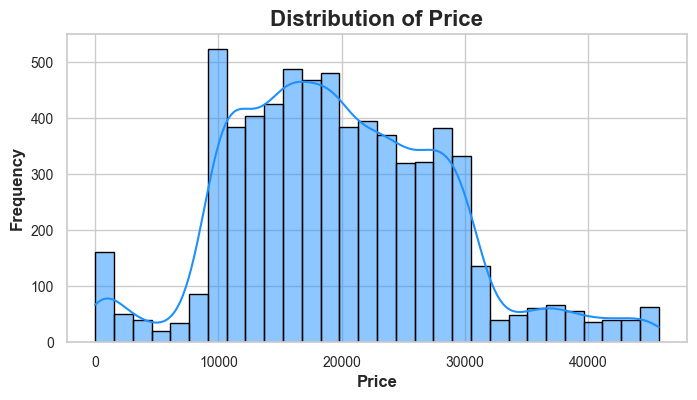

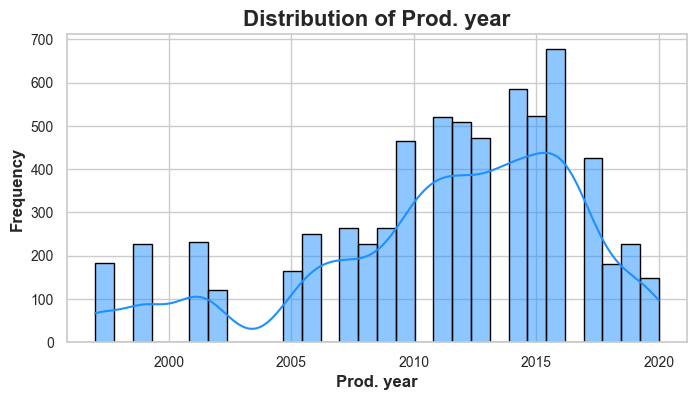

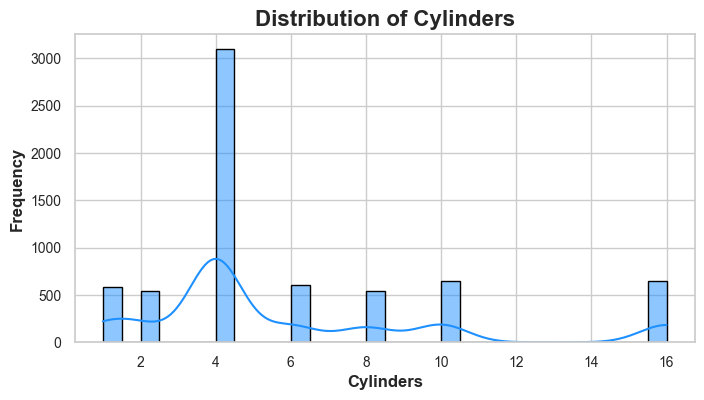

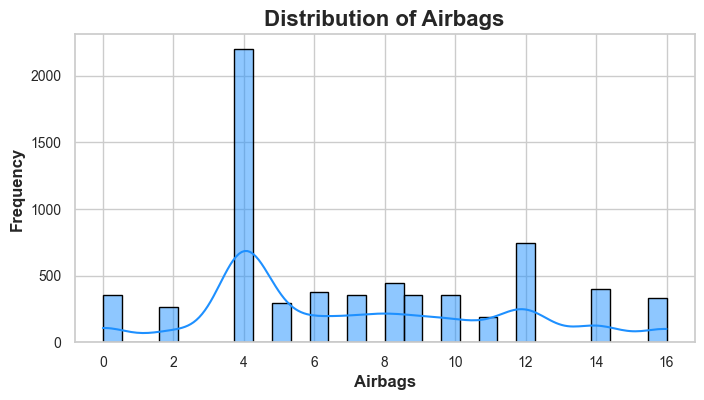

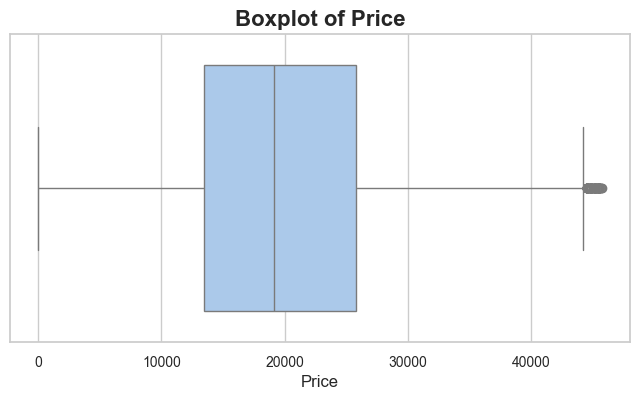

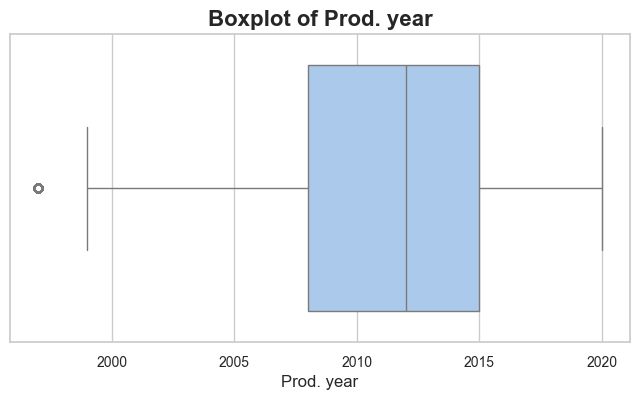

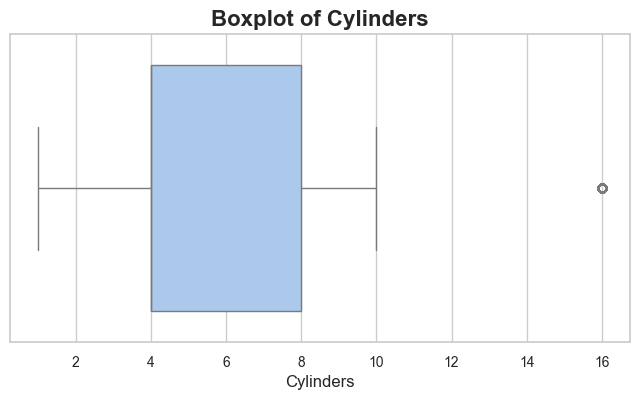

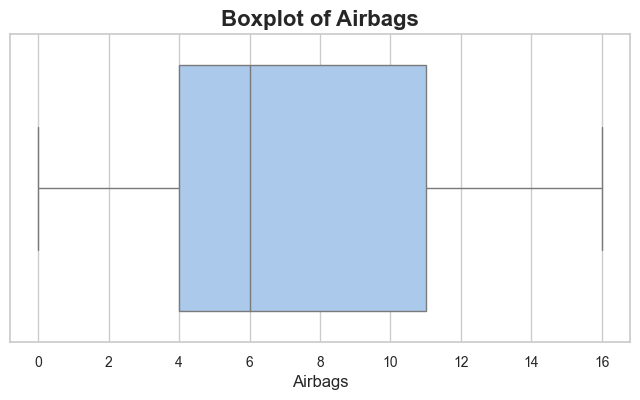

In [362]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette
palette = sns.color_palette("viridis", as_cmap=True)

# Histogram for numerical features
for feature in non_ob:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30, color='dodgerblue', edgecolor='black')
    plt.title(f'Distribution of {feature}', fontsize=16, fontweight='bold')
    plt.xlabel(feature, fontsize=12, fontweight='bold')
    plt.ylabel('Frequency', fontsize=12, fontweight='bold')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Boxplot for numerical features with enhanced color
for feature in non_ob:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=feature, palette='pastel')
    plt.xticks(fontsize=10)  # Decrease font size of x-axis tick labels
    plt.yticks(fontsize=10)
    plt.title(f'Boxplot of {feature}', fontsize=16, fontweight='bold')
    plt.show()

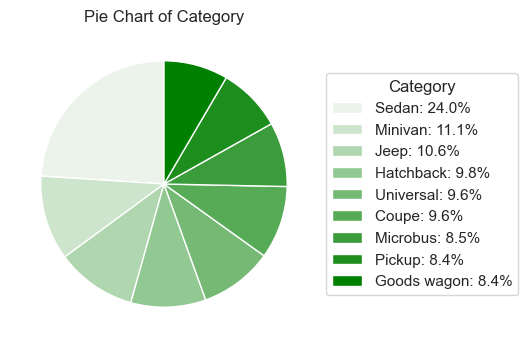

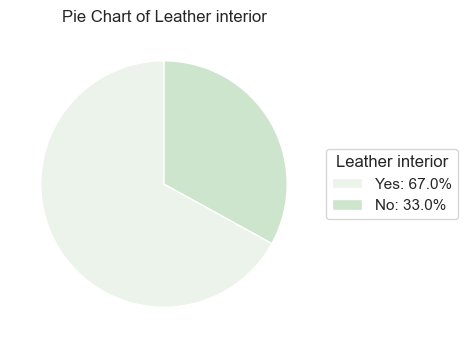

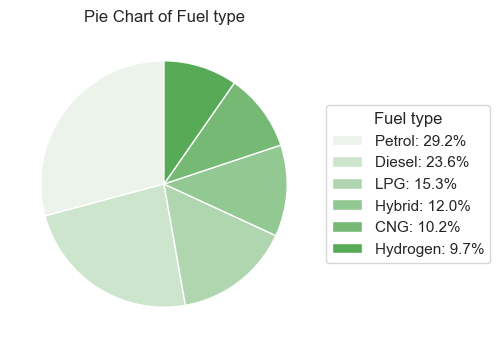

In [363]:
pie_charts = ['Category', 'Leather interior', 'Fuel type']

# Use Seaborn to generate a red color palette
palette = sns.light_palette("green", n_colors=9)  # Light red shades, adjust n_colors if necessary

# Plot the pie charts of all the features
for feature in pie_charts:
    plt.figure(figsize=(8, 4))

    # Get value counts and calculate percentages
    value_counts = df[feature].value_counts()
    percentages = value_counts / value_counts.sum() * 100

    # Plot the pie chart using Seaborn red color palette
    wedges, texts = plt.pie(value_counts, colors=palette[:len(value_counts)], startangle=90)

    # Create labels with the category names and percentages
    labels = [f'{label}: {percentage:.1f}%' for label, percentage in zip(value_counts.index, percentages)]

    # Add a legend to the side with percentages
    plt.legend(wedges, labels, title=feature, loc="center left", bbox_to_anchor=(1, 0.5))

    # Set the title of the chart
    plt.title(f'Pie Chart of {feature}')
    plt.show()

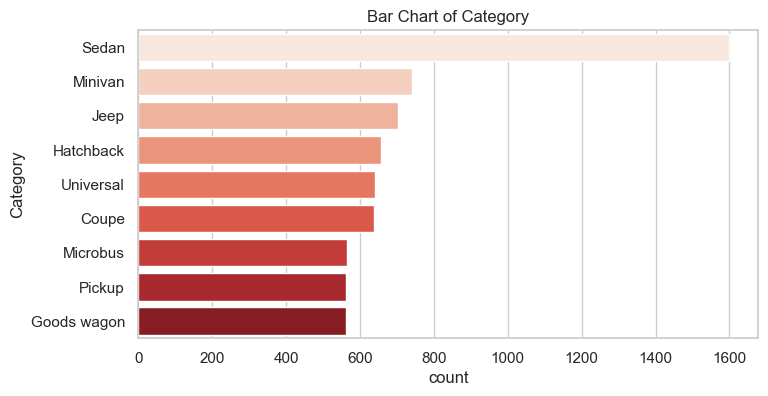

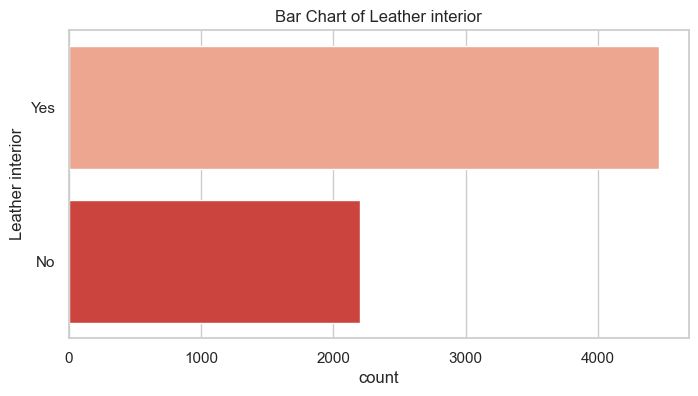

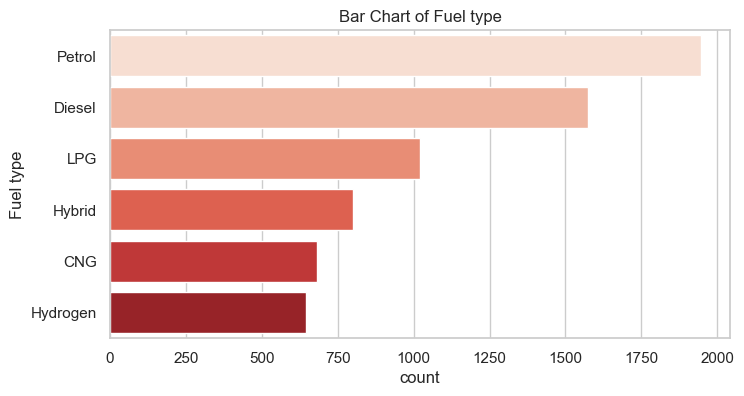

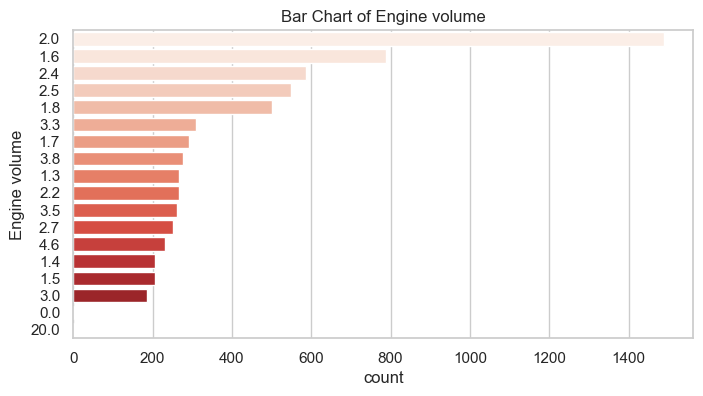

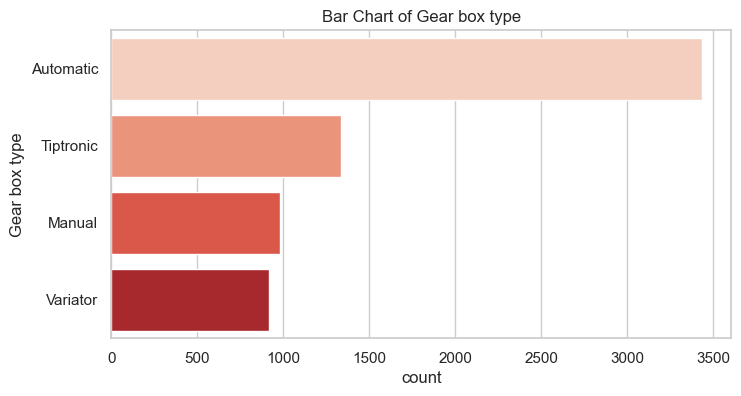

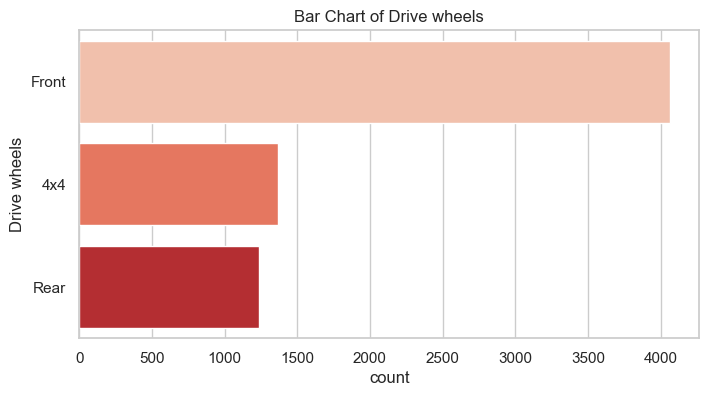

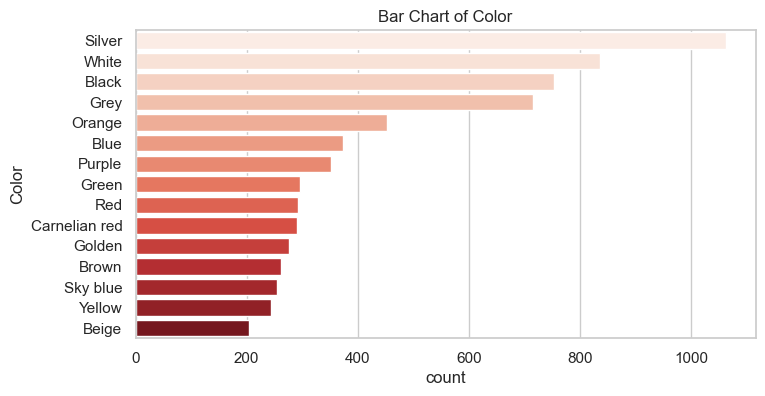

In [364]:
bar_charts = ['Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Gear box type', 'Drive wheels', 'Color']

for feature in bar_charts:
    plt.figure(figsize=(8, 4))

    # Plot the value counts as a bar chart using a Seaborn pink palette
    sns.countplot(y=feature, data=df, order=df[feature].value_counts().index, palette="Reds")

    plt.title(f'Bar Chart of {feature}')
    plt.show()

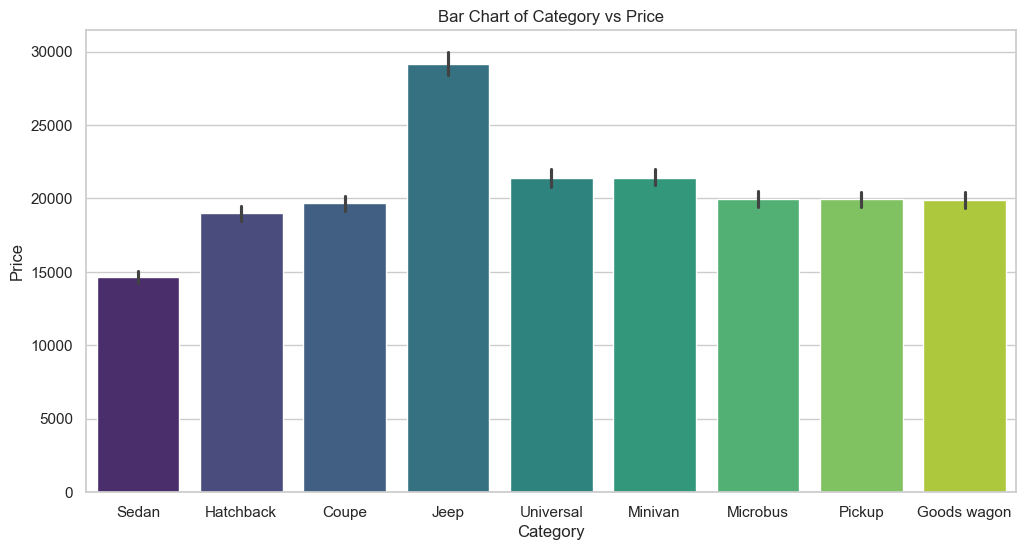

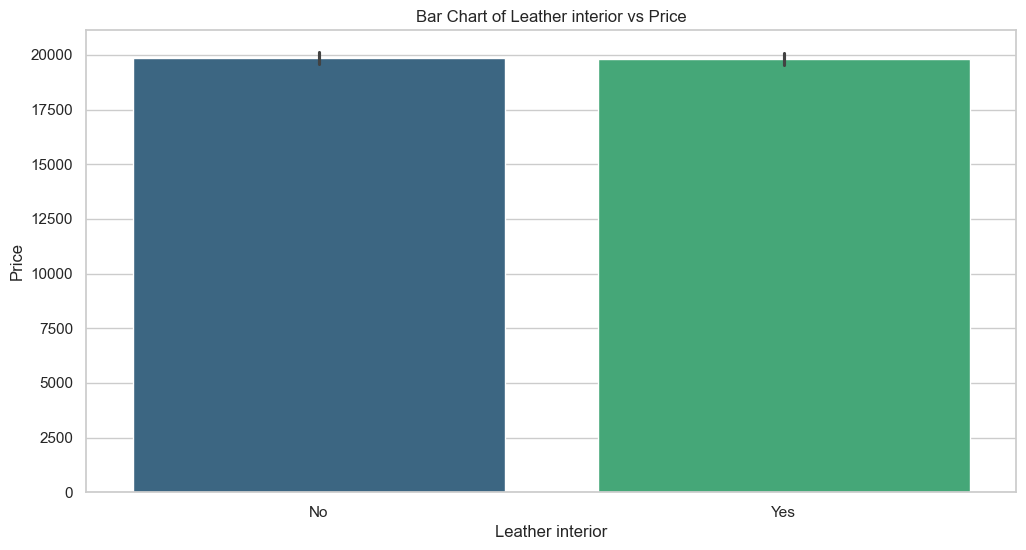

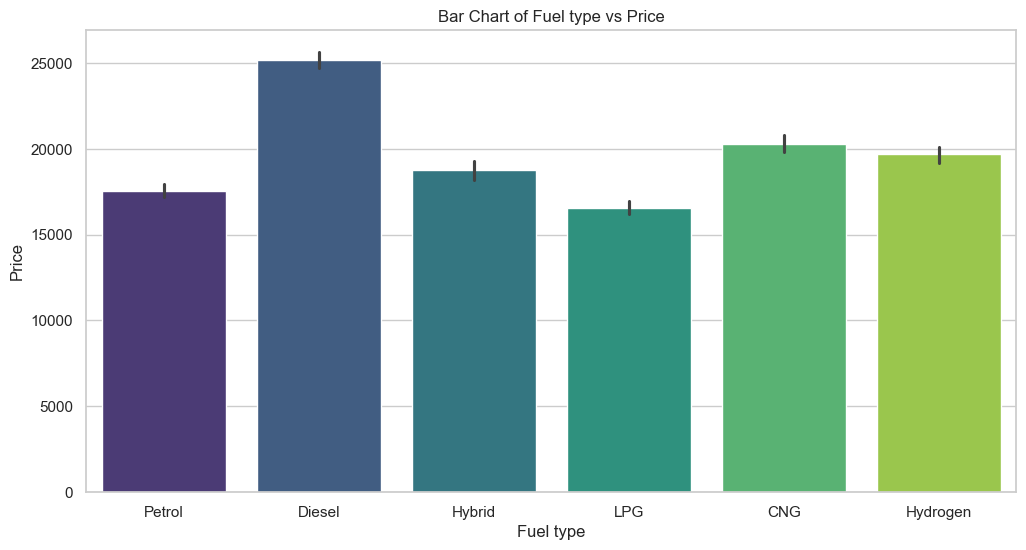

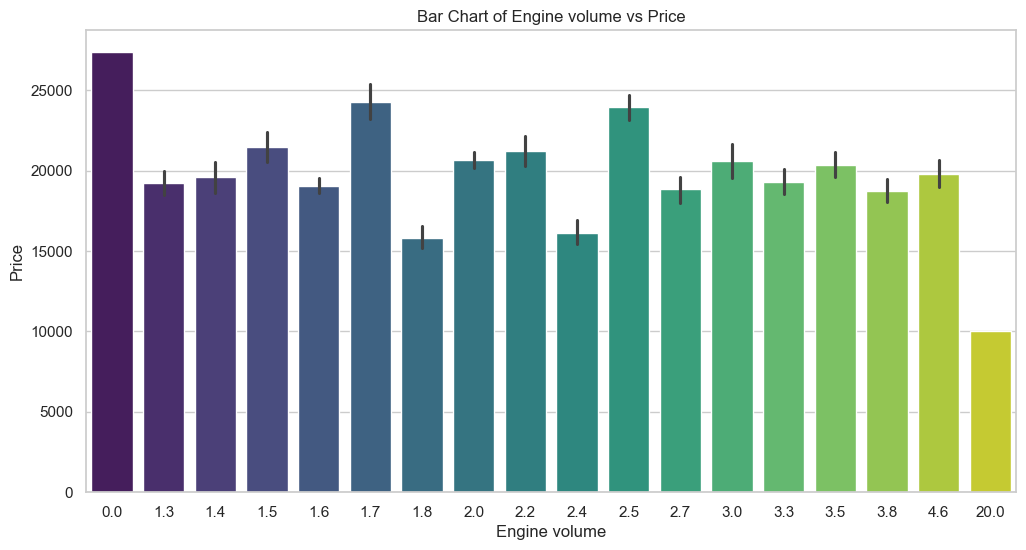

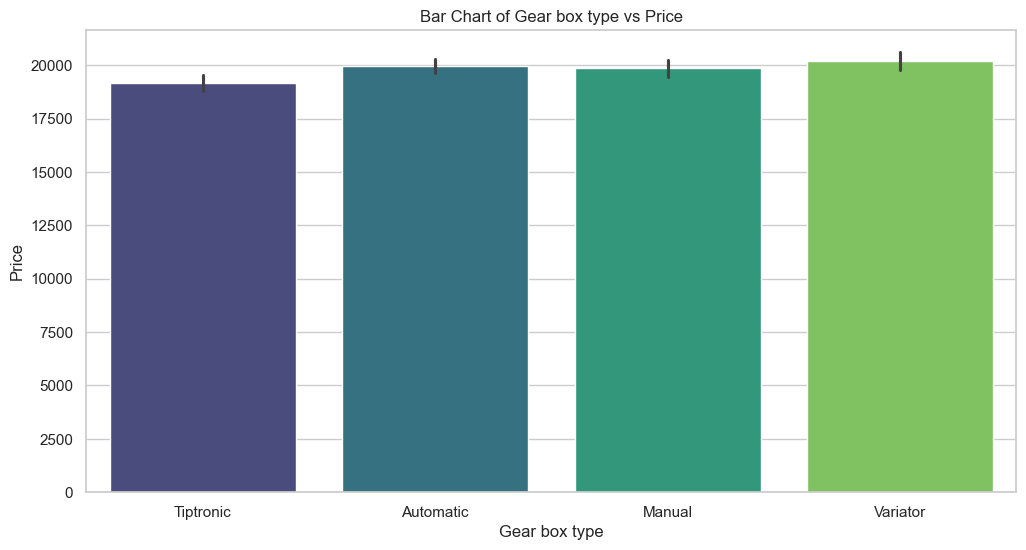

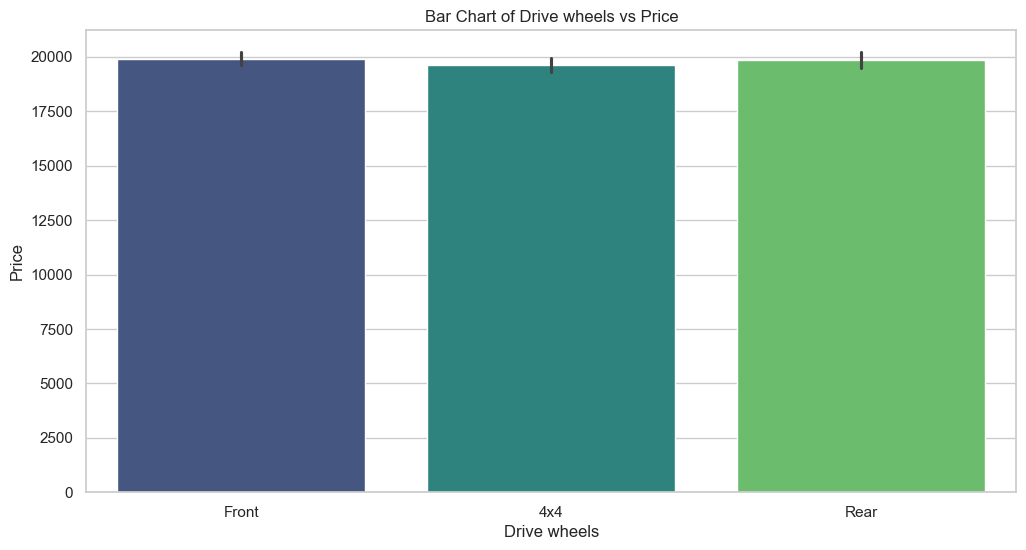

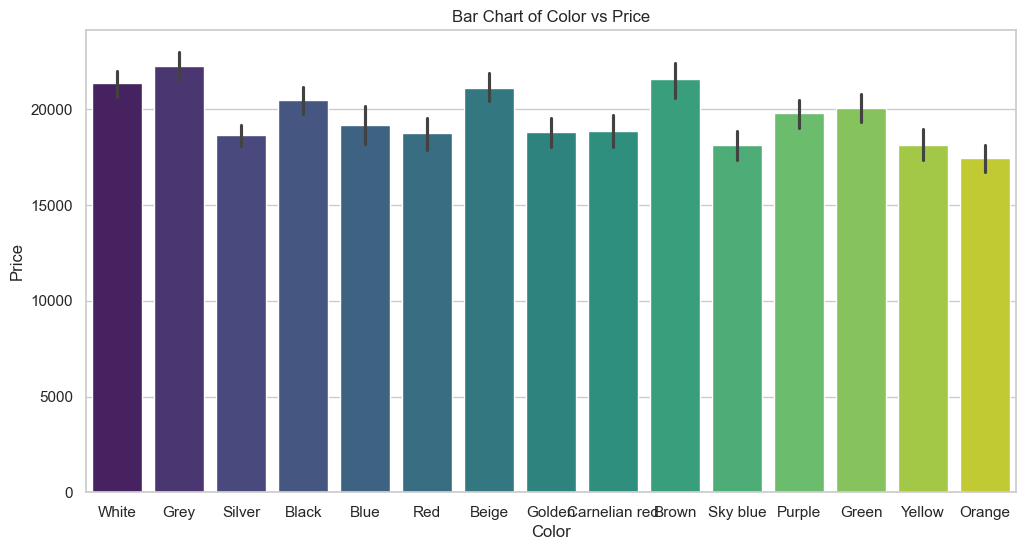

In [365]:
# Bar charts for all the feamtures with Price
bar_charts = ['Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Gear box type', 'Drive wheels', 'Color']

for feature in bar_charts:
    plt.figure(figsize=(12, 6))

    # Plot the value counts as a bar chart using a Seaborn pink palette
    sns.barplot(x=feature, y='Price', data=df, palette='viridis')

    plt.title(f'Bar Chart of {feature} vs Price')
    plt.show()

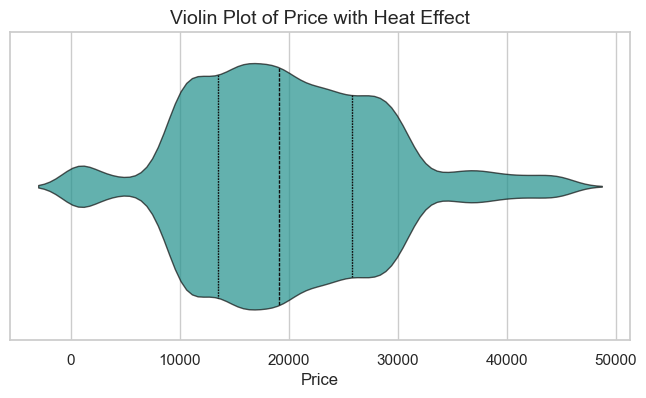

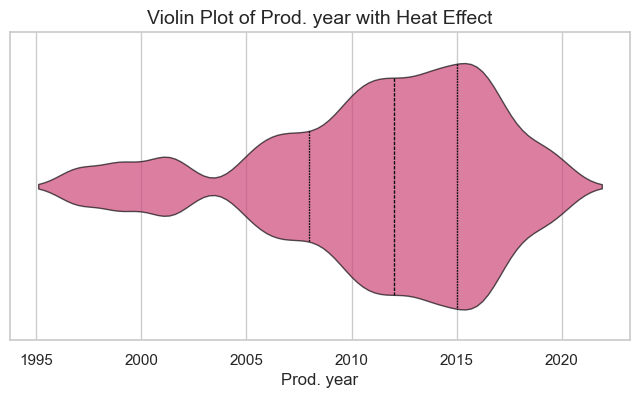

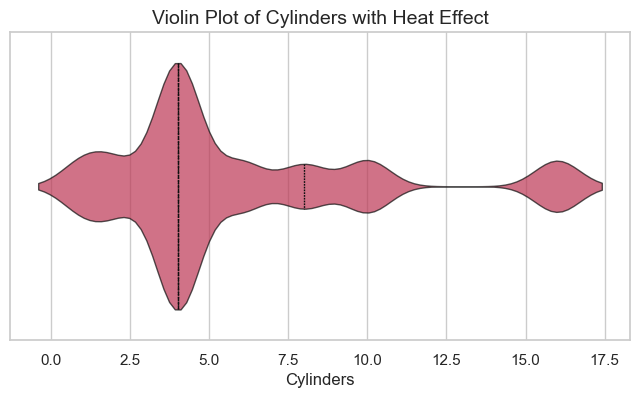

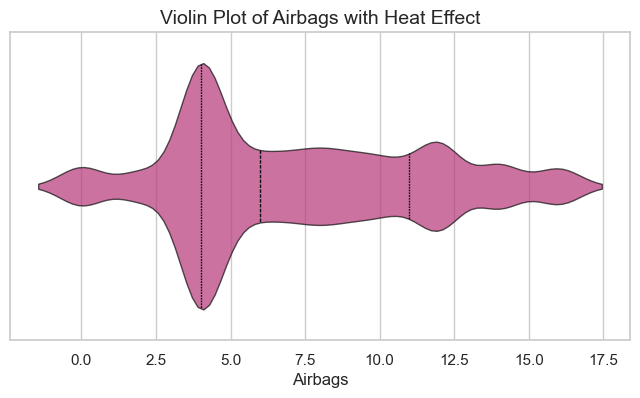

In [366]:
# List of colormaps for the heat shades
colormaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

# Violin plots with heat shades for numerical and categorical features
for i, feature in enumerate(non_ob):
    plt.figure(figsize=(8, 4))
    
    # Choose colormap based on the feature index
    cmap = plt.get_cmap(colormaps[i % len(colormaps)])
    
    # Create the violin plot without filling it in
    parts = sns.violinplot(data=df, x=feature, inner="quartile", color="k", linewidth=1)
    
    # Extract the collection of violin patches
    for violin in parts.collections[::2]:  # Pick only the violin bodies
        # Get the paths and apply colormap based on y-values
        path = violin.get_paths()[0]
        vertices = path.vertices
        ys = vertices[:, 1]
        
        # Normalize the y-values to apply the colormap
        norm = plt.Normalize(ys.min(), ys.max())
        colors = cmap(norm(ys))
        
        # Set the face color of each section of the violin based on the y-values
        violin.set_facecolor(cmap(norm(ys.mean())))
        violin.set_alpha(0.7)  # Optional: add transparency to enhance the heat effect

    plt.title(f'Violin Plot of {feature} with Heat Effect', fontsize=14)
    plt.show()

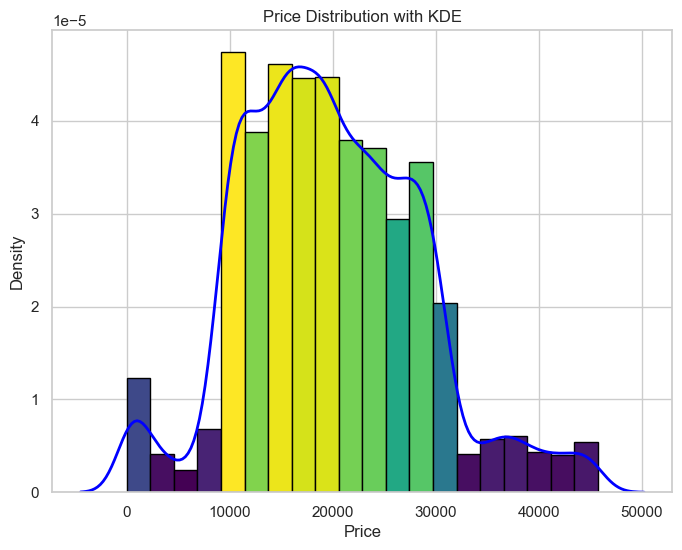

In [367]:
# Define a valid color map
colormap = plt.get_cmap('viridis')

# Compute density
hist_data, bin_edges = np.histogram(df['Price'], bins=20, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Normalize the density to range [0, 1] for color mapping
norm = plt.Normalize(hist_data.min(), hist_data.max())
colors = colormap(norm(hist_data))

# Plot histogram with color gradient
plt.figure(figsize=(8, 6))
bars = plt.bar(bin_centers, hist_data, width=bin_edges[1] - bin_edges[0], color=colors, edgecolor='black')

# Add KDE curve
sns.kdeplot(df['Price'], color='blue', linewidth=2)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Price Distribution with KDE')

# Show plot
plt.show()

##  1. Price vs. Numeric Features

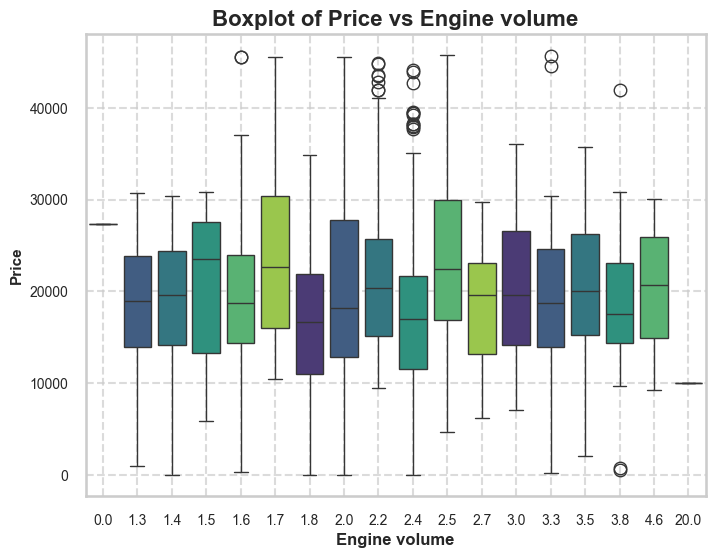

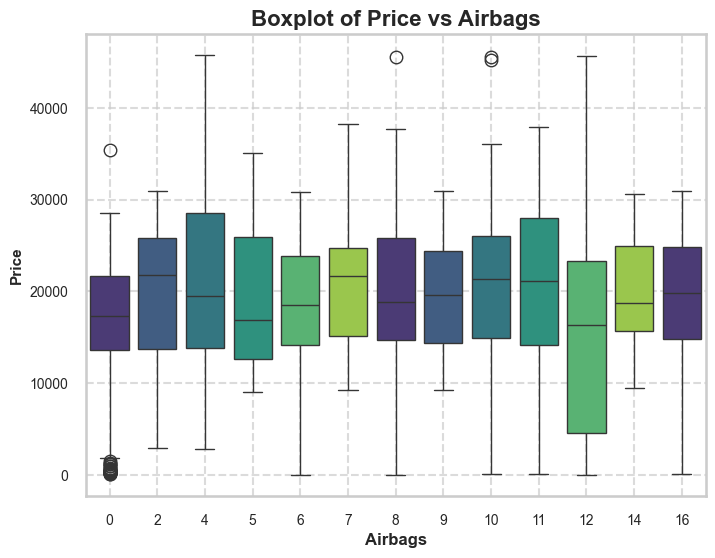

In [368]:
# Define a Seaborn color palette
palette_boxplot = sns.color_palette("viridis")  # Use 'viridis' palette

# Set Seaborn style and context
sns.set_style("whitegrid")  # Options: 'darkgrid', 'white', 'dark', 'whitegrid', 'ticks'
sns.set_context("talk")    # Options: 'paper', 'notebook', 'talk', 'poster'

# List of numeric features
numeric_features = ['Engine volume', 'Airbags']

# Create boxplots for each numeric feature
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=feature, y='Price', palette=palette_boxplot)
    plt.title(f'Boxplot of Price vs {feature}', fontsize=16, fontweight='bold')
    plt.xlabel(feature, fontsize=12, fontweight='bold')
    plt.ylabel('Price', fontsize=11, fontweight='bold')

    # Adjust tick label font size
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines for better readability
    plt.show()

## 2. Price vs. Categorical Features

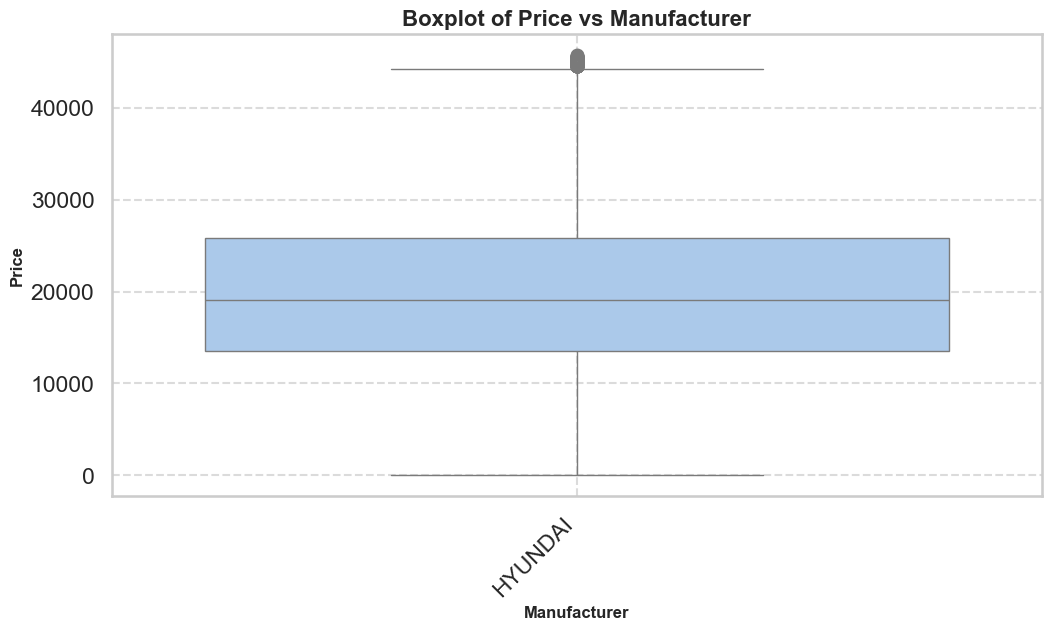

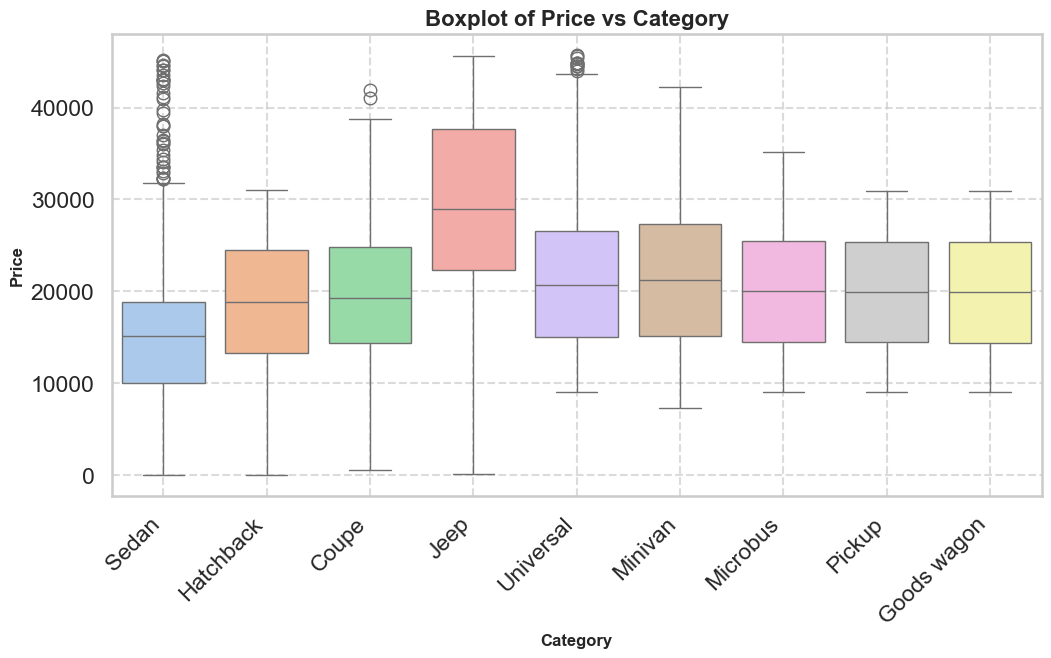

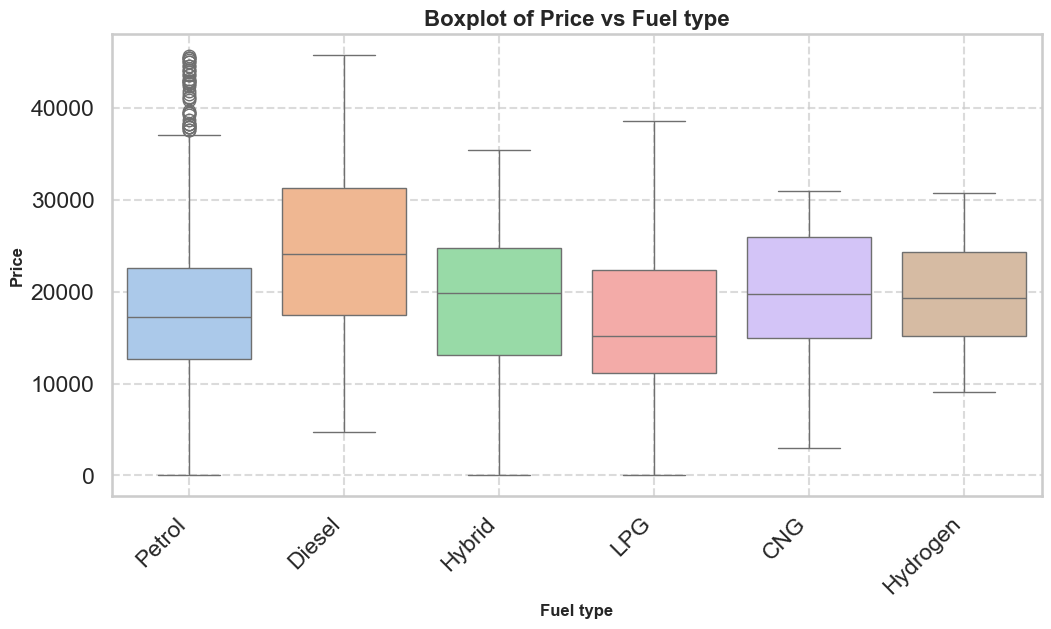

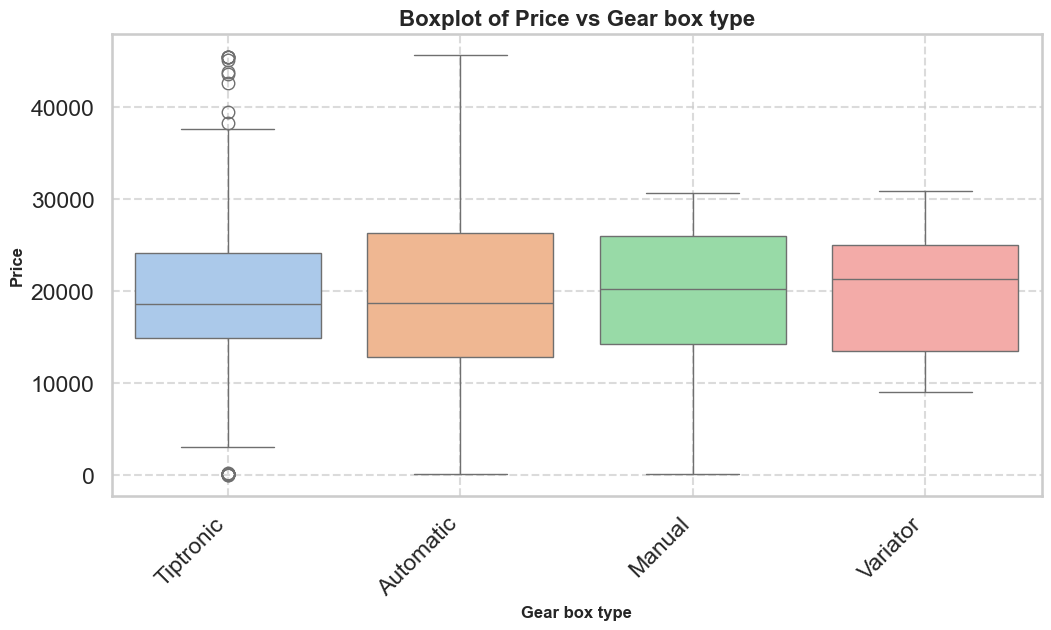

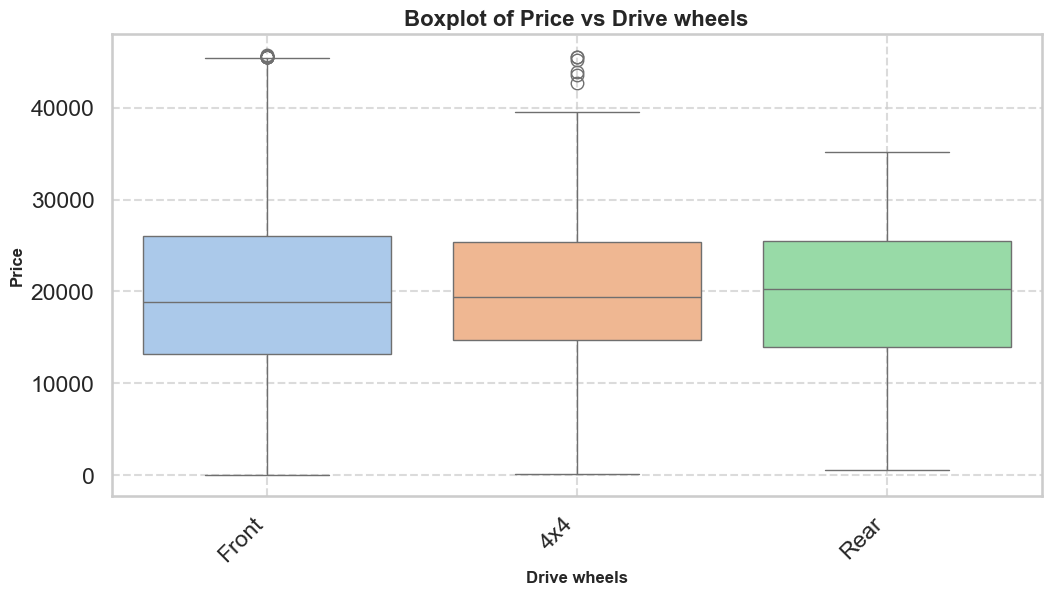

In [369]:
# Define a Seaborn color palette
palette = sns.color_palette("pastel")  # Use any Seaborn palette you like

# Set Seaborn style and context
sns.set_style("whitegrid")  # You can choose from 'darkgrid', 'white', 'dark', 'whitegrid', 'ticks'
sns.set_context("talk")    # You can choose from 'paper', 'notebook', 'talk', 'poster'

# List of categorical features
categorical_features = ['Manufacturer', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels']

# Create boxplots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=feature, y='Price', palette=palette)
    plt.title(f'Boxplot of Price vs {feature}', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align them to the right
    plt.xlabel(feature, fontsize=12, fontweight='bold')  # Label x-axis with feature name
    plt.ylabel('Price', fontsize=12, fontweight='bold')  # Label y-axis

    # Add gridlines for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.show()

## 3. Pairwise Relationships

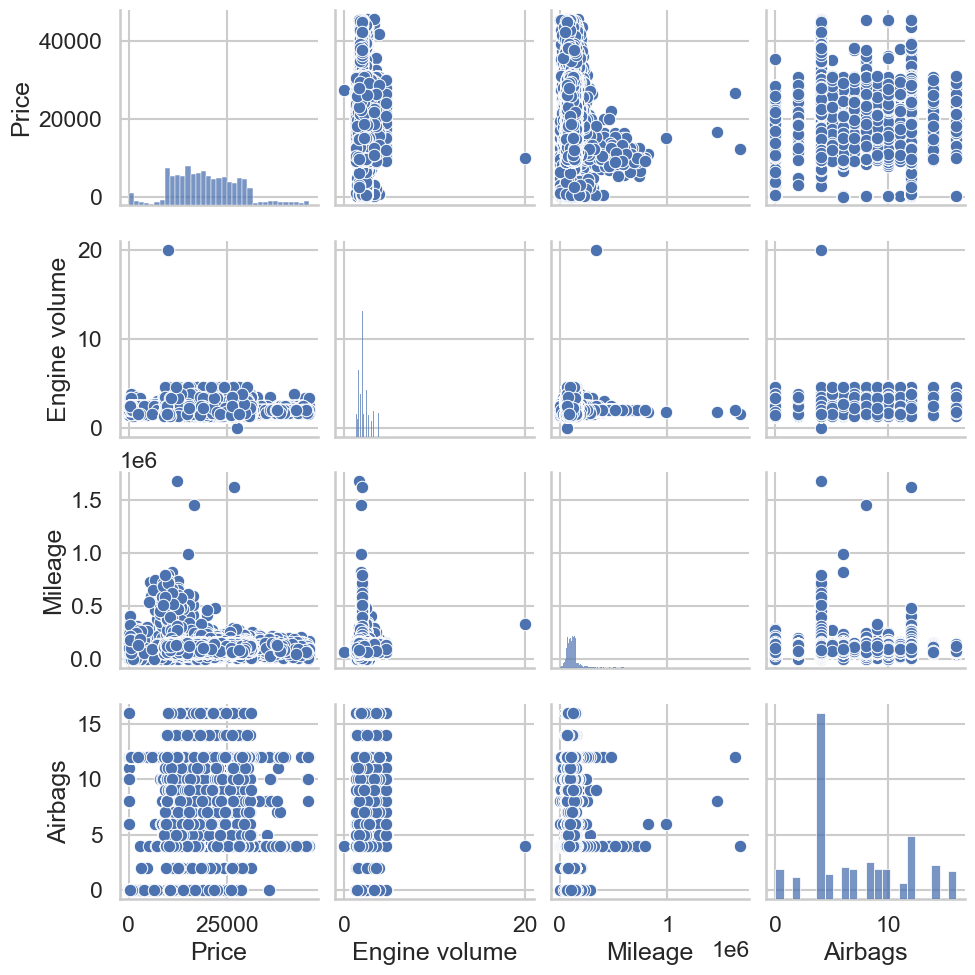

In [370]:
sns.pairplot(df[['Price', 'Engine volume', 'Mileage', 'Airbags']])
plt.show()

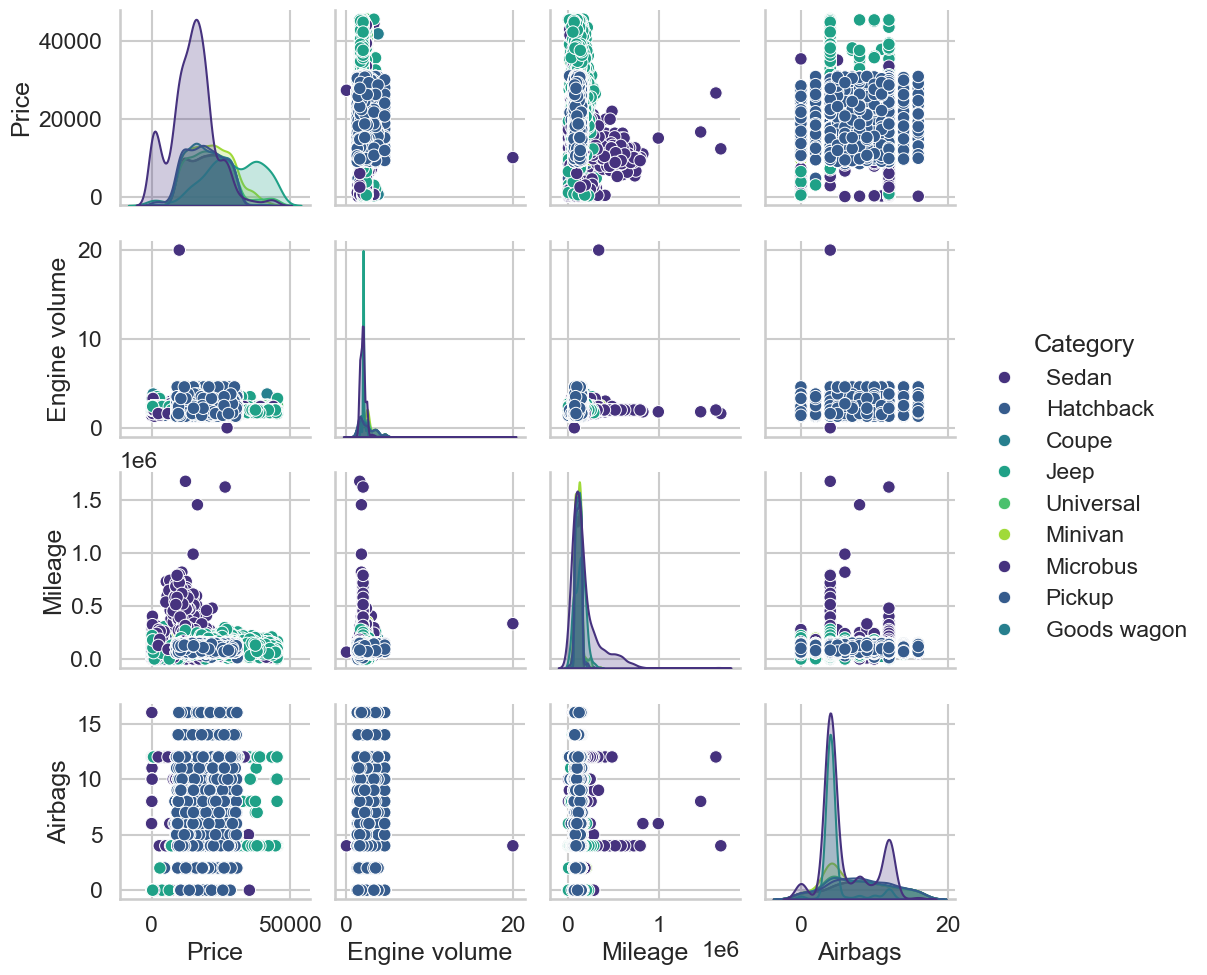

In [371]:
# Enhance the visualizations of the plots
palette = sns.color_palette("viridis")

# Pairplot with color palette
g = sns.pairplot(df[['Price', 'Engine volume', 'Mileage', 'Airbags', 'Category']], hue='Category', palette=palette)

plt.show()

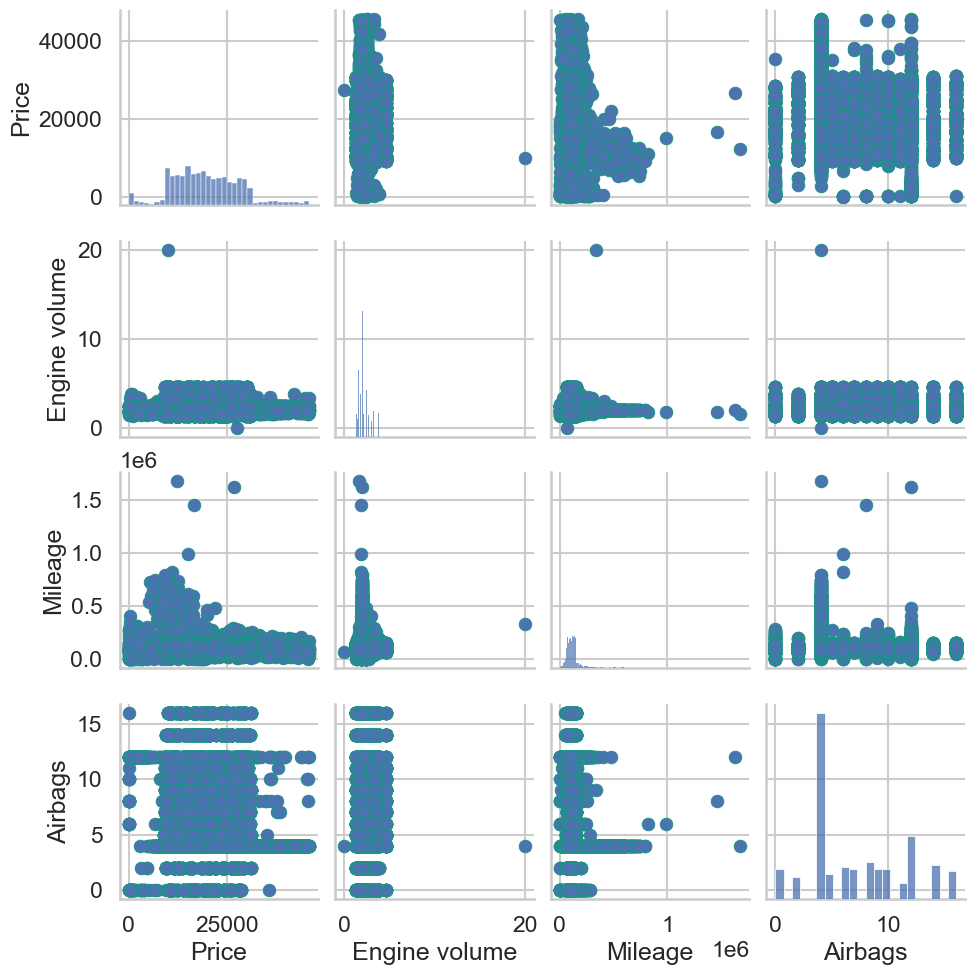

In [372]:
# Define a Seaborn color palette
palette = sns.color_palette("viridis", as_cmap=True)

# Create a pairplot
g = sns.pairplot(df[['Price', 'Engine volume', 'Mileage', 'Airbags']])

# Apply a color palette to scatter plots
for ax in g.axes.flatten():
    # Iterate over collections to apply color to scatter plot markers
    for collection in ax.collections:
        collection.set_edgecolor(palette(0.5))  # Modify as needed

plt.show()

## 4. Correlation Heatmap

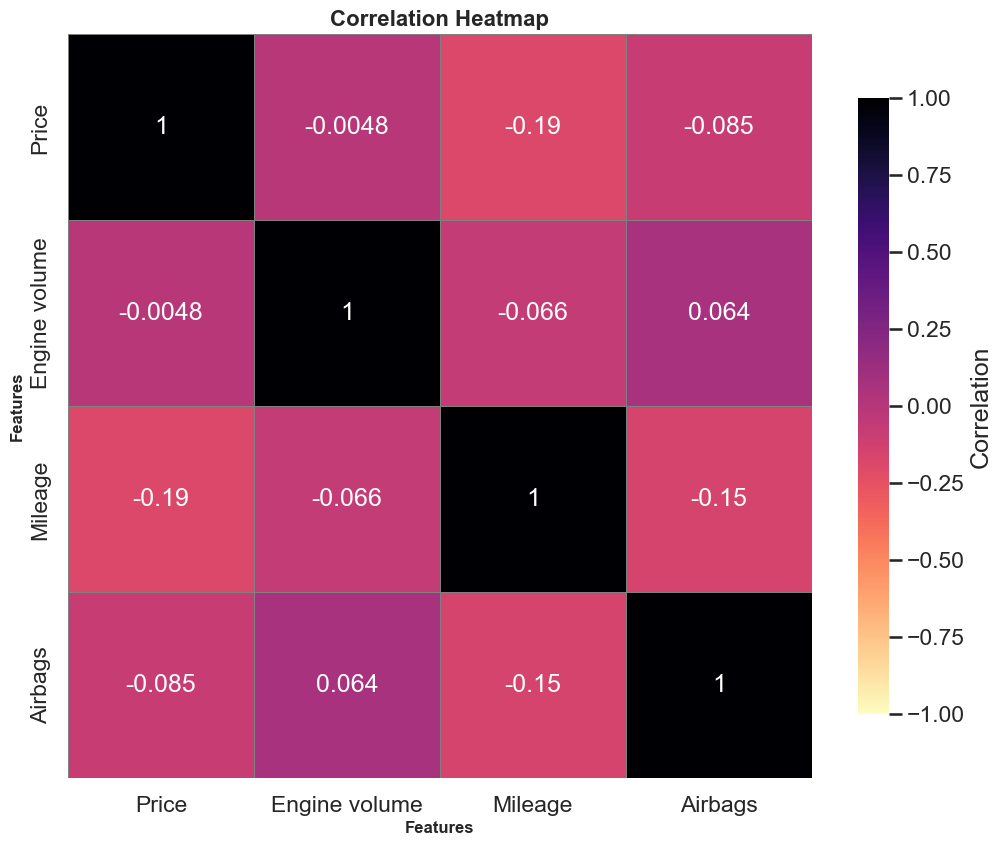

In [373]:
import matplotlib.colors as mcolors

# Define a Seaborn color palette and convert to colormap
cmap = sns.color_palette("magma", as_cmap=True)

# Reverse the colormap
cmap_reversed = mcolors.LinearSegmentedColormap.from_list(
    "reversed_magma", cmap(np.linspace(1, 0, cmap.N))
)

# Set Seaborn style and context
sns.set_style("whitegrid")  # You can choose from 'darkgrid', 'white', 'dark', 'whitegrid', 'ticks'
sns.set_context("talk")    # You can choose from 'paper', 'notebook', 'talk', 'poster'

# Compute correlation matrix
plt.figure(figsize=(12, 10))  # Increase figure size for better readability
corr_matrix = df[['Price', 'Engine volume', 'Mileage', 'Airbags']].corr()

# Plot the heatmap with the reversed colormap
ax = sns.heatmap(
    corr_matrix,
    annot=True,
    cmap=cmap_reversed,
    vmin=-1,
    vmax=1,
    center=0,
    linewidths=0.5,
    linecolor='gray',
    square=True,  # Ensure the heatmap is square
    cbar_kws={'shrink': 0.8, 'label': 'Correlation'}  # Customize colorbar
)

# Enhance the plot with additional aesthetics
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')

# Add gridlines with a specific style
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

## For floats and int values

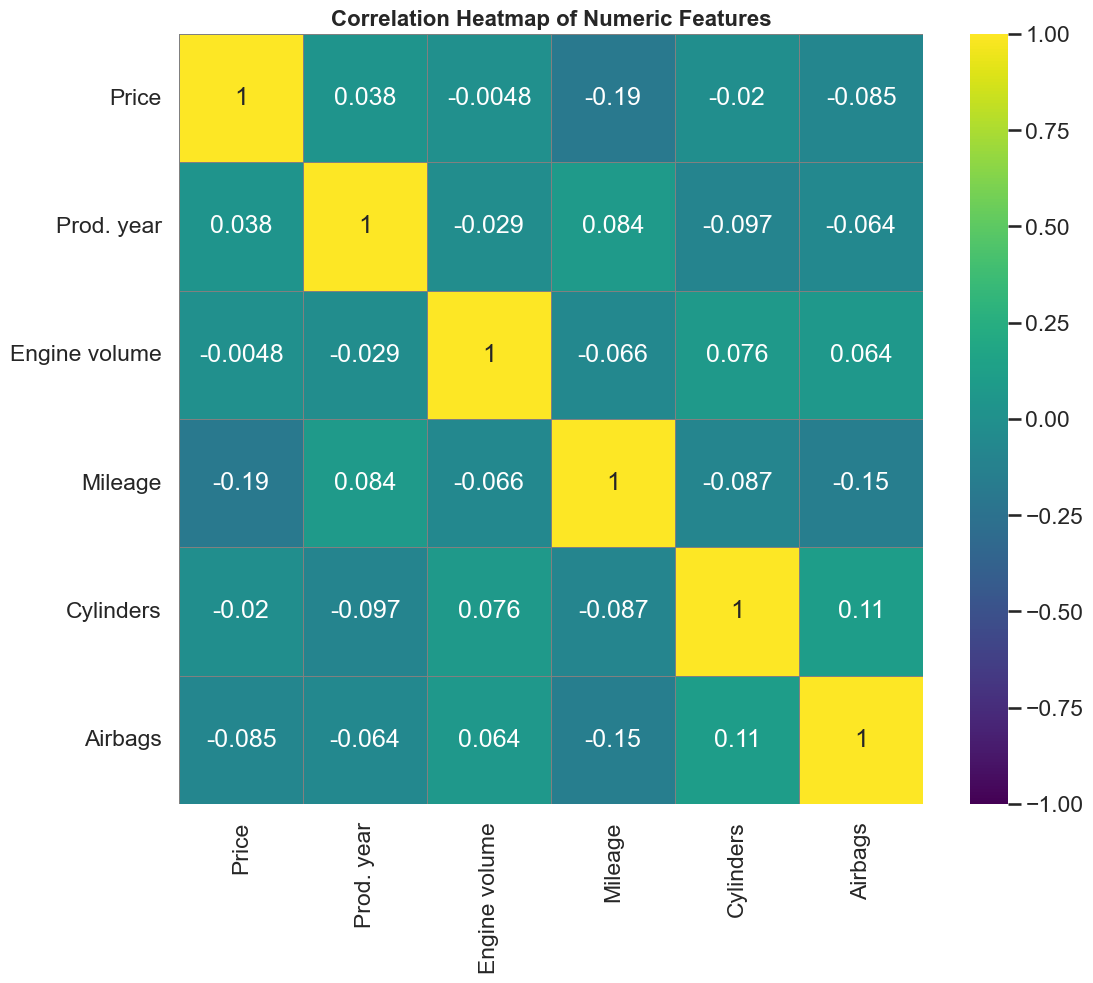

In [374]:
# Filter numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, center=0, linewidths=0.5, linecolor='gray')
plt.title('Correlation Heatmap of Numeric Features', fontsize=16, fontweight='bold')
plt.show()

## 5. Categorical Feature Counts

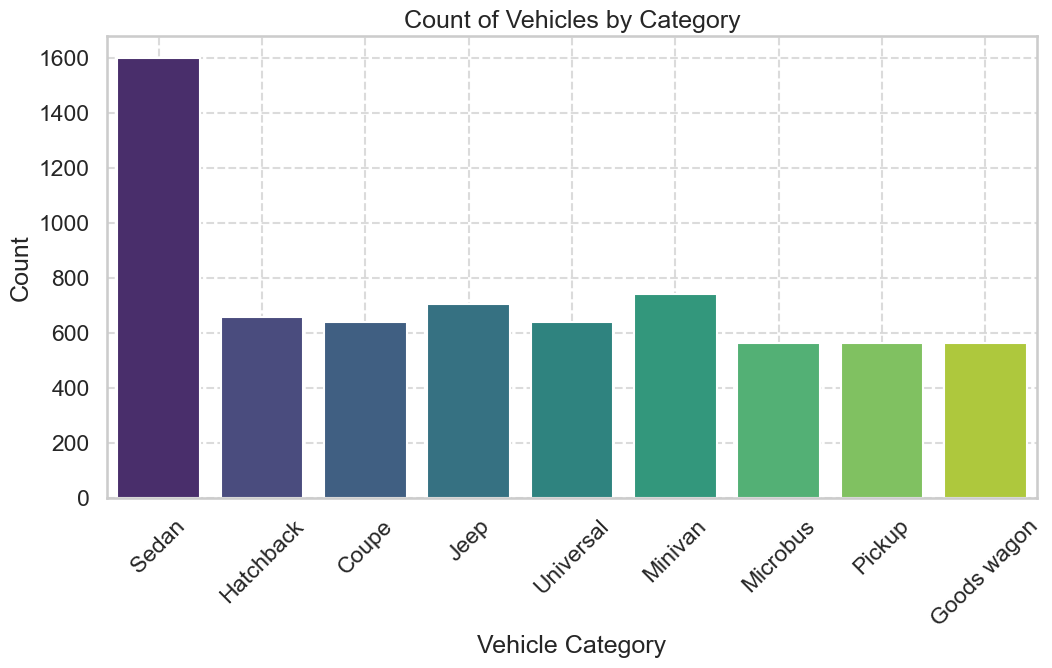

In [375]:
# Set Seaborn style and context
sns.set_style("whitegrid")  # You can choose from 'darkgrid', 'white', 'dark', 'whitegrid', 'ticks'
sns.set_context("talk")    # You can choose from 'paper', 'notebook', 'talk', 'poster'

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', palette='viridis')  # Apply a color palette
plt.title('Count of Vehicles by Category')  # Updated title to reflect 'Category'
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Vehicle Category')  # Label for x-axis
plt.ylabel('Count')  # Label for y-axis

# Enhance the plot with additional aesthetics
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid with dashed lines

plt.show()

## 6. Feature Interactions

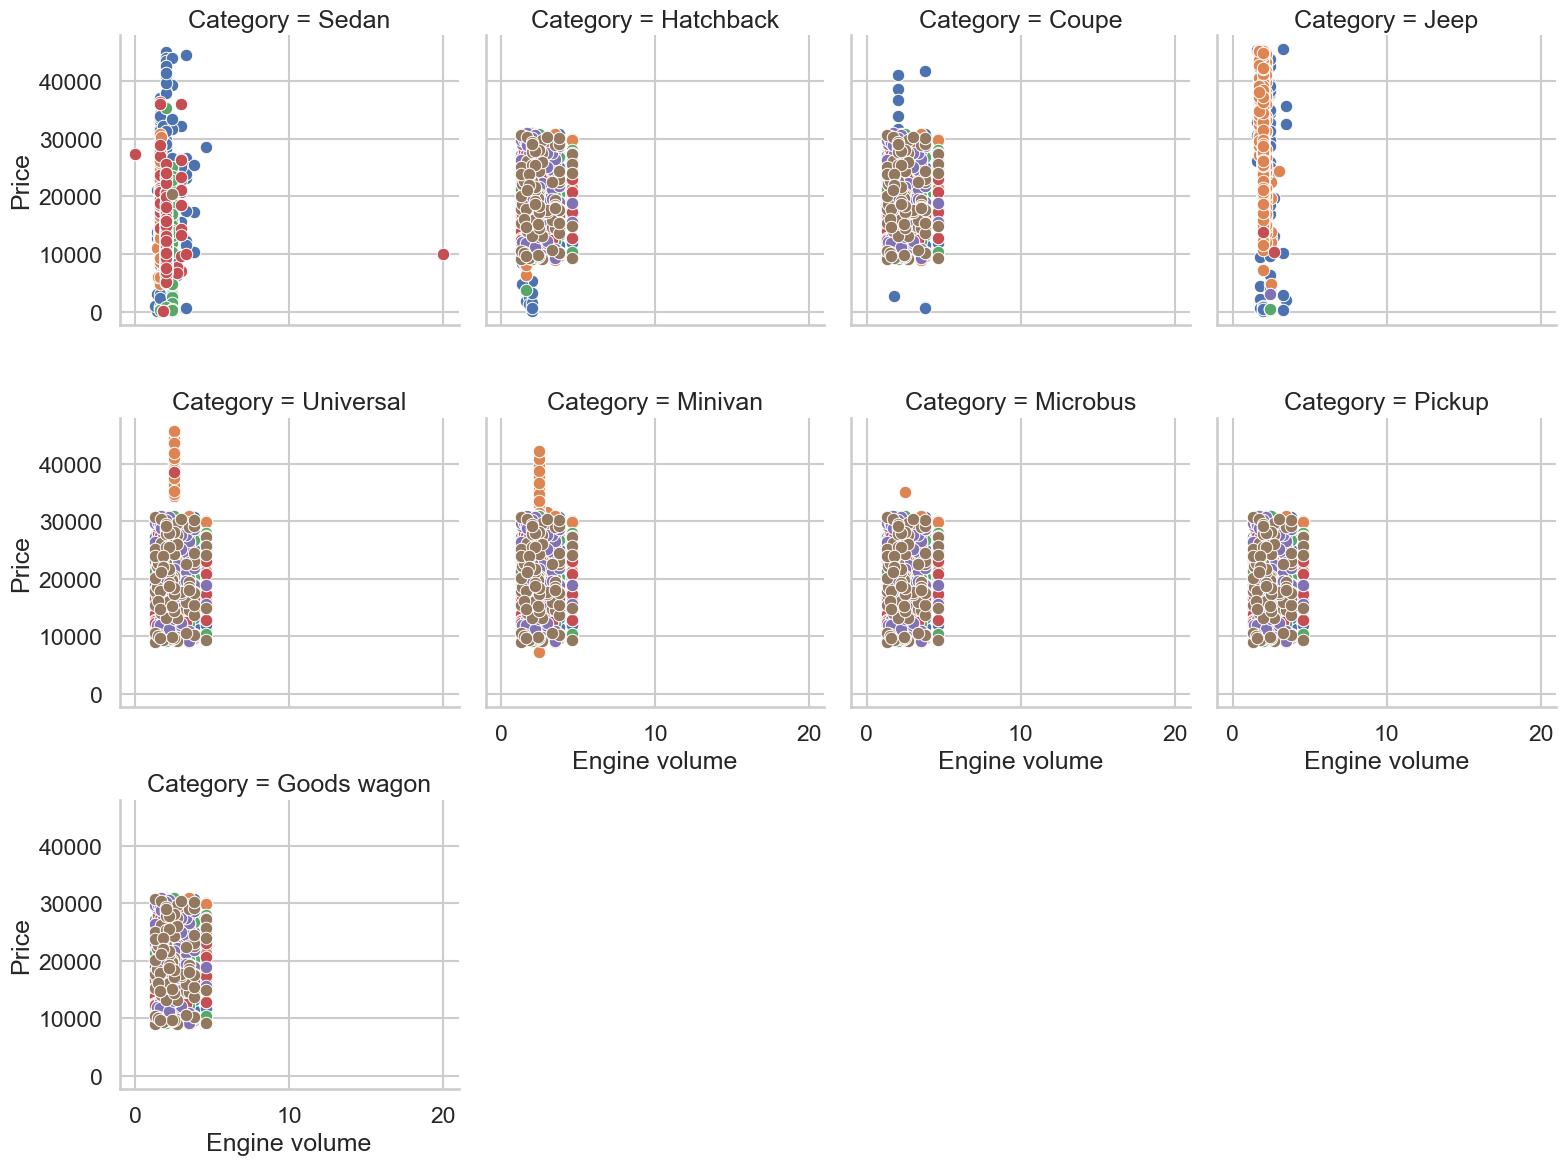

In [376]:
g = sns.FacetGrid(df, col='Category', hue='Fuel type', col_wrap=4, height=4)
g.map(sns.scatterplot, 'Engine volume', 'Price')
plt.show()

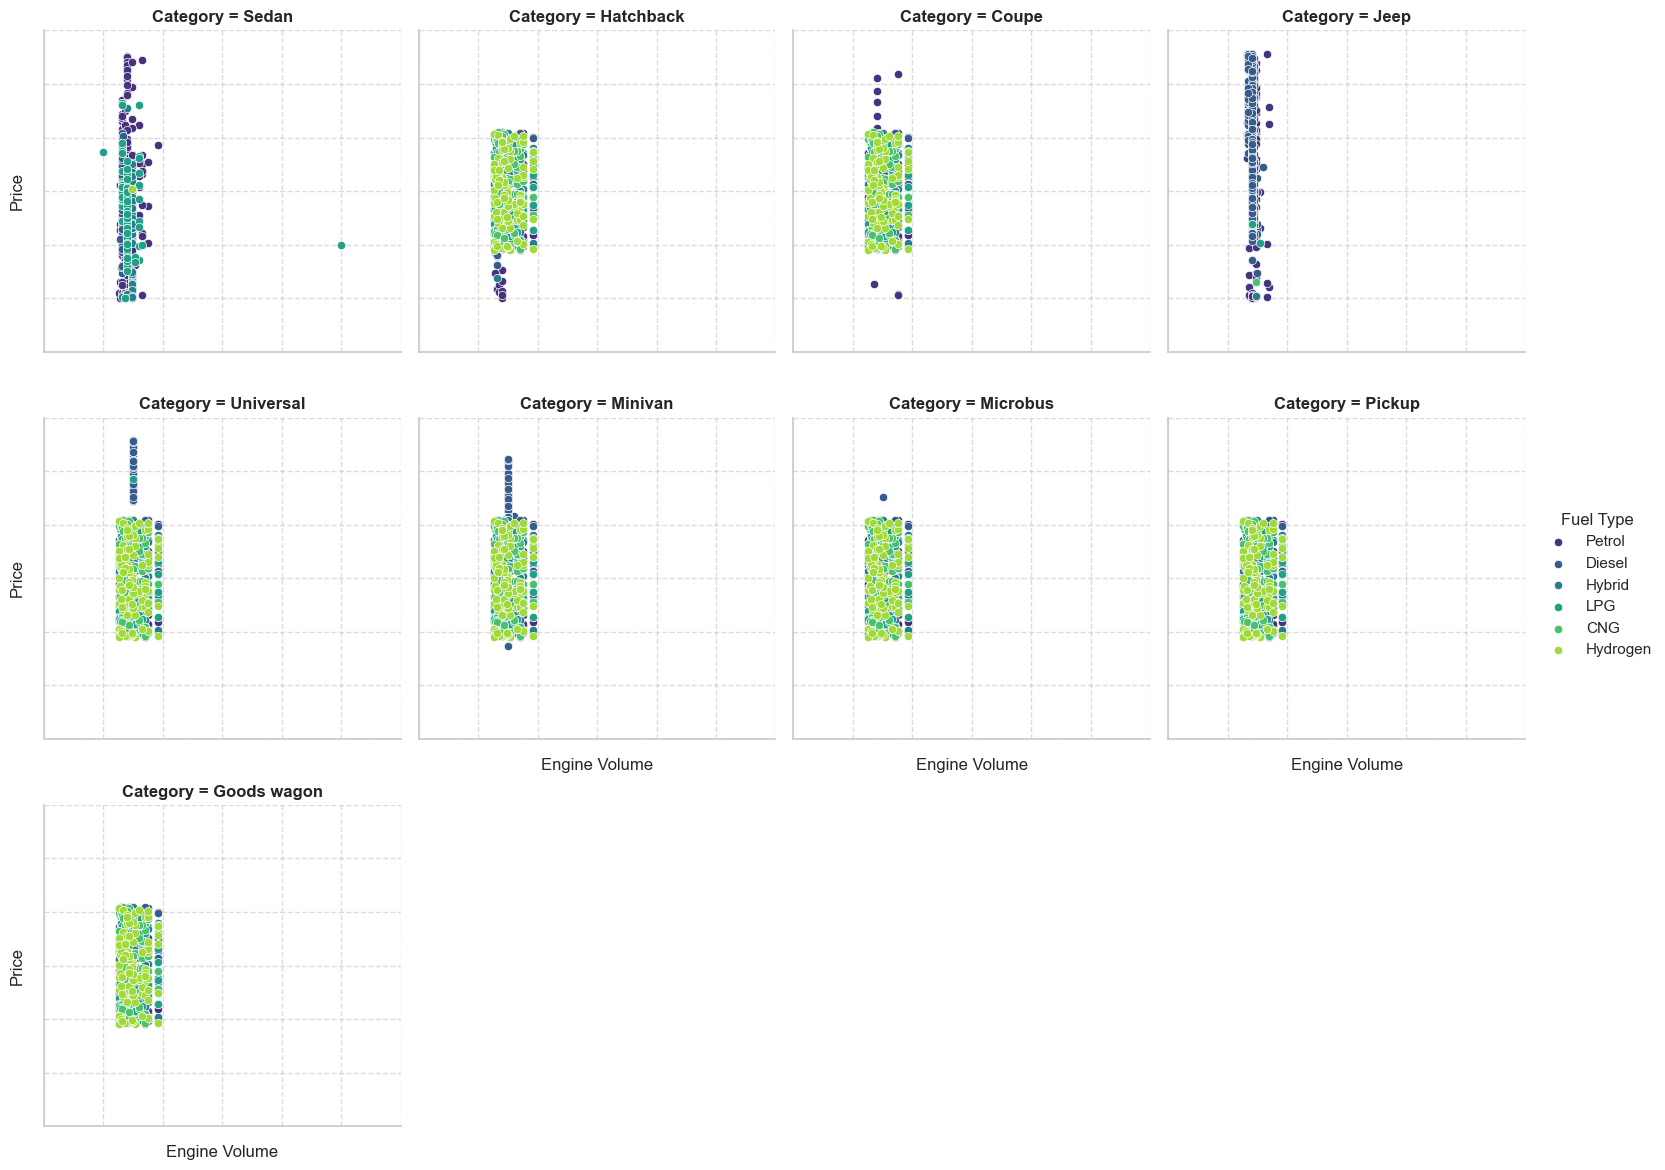

In [377]:
# Set Seaborn style and context
sns.set_style("whitegrid")  # Options: 'darkgrid', 'white', 'dark', 'whitegrid', 'ticks'
sns.set_context("notebook")  # Options: 'paper', 'notebook', 'talk', 'poster'

# Create FacetGrid for scatter plots
g = sns.FacetGrid(df, col='Category', hue='Fuel type', col_wrap=4, height=4, palette='viridis')
g.map(sns.scatterplot, 'Engine volume', 'Price')

# Enhance plot with titles, labels, and legend
g.set_axis_labels('Engine Volume', 'Price')
g.set_titles(col_template='{col_name}')
g.add_legend(title='Fuel Type')

# Adjust font sizes
g.set_titles(fontsize=14, fontweight='bold')
g.set_axis_labels(fontsize=12, fontweight='bold')
g.set_xticklabels(fontsize=10)
g.set_yticklabels(fontsize=10)

# Add gridlines for better readability
for ax in g.axes.flat:
    ax.grid(True, linestyle='--', alpha=0.7)

plt.show()


In [378]:
# Check for unique values in 'Cylinders'
print(df['Cylinders'].value_counts())

Cylinders
4     3098
10     652
16     645
6      604
1      583
8      542
2      541
Name: count, dtype: int64


## Encoding

In [683]:
from sklearn.preprocessing import LabelEncoder

In [684]:
encode_list = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']
encoder = LabelEncoder()

In [685]:
# Encode the categorical features that include in df
for feature in encode_list:
    df[feature] = encoder.fit_transform(df[feature])

In [686]:
df.head()

Price  Manufacturer  Model  Prod. year  Category  Leather interior  \
1065  21326.0             0      0        2016         7                 0   
1066   9408.0             0      0        2012         2                 1   
1068  13877.0             0      0        2012         7                 1   
1069  14113.0             0      0        2013         2                 0   
1070  16289.0             0      0        2015         7                 1   

      Fuel type  Engine volume   Mileage  Cylinders  Gear box type  \
1065          5            1.6   80000.0          4              2   
1066          1            1.6   60480.0          4              0   
1068          1            1.6  213131.0          4              0   
1069          5            1.6  136000.0          4              2   
1070          1            1.6  112360.0          4              0   

      Drive wheels  Doors  Wheel  Color  Airbags  
1065             1      1      0     13        6  
1066             1      1      0     13        4  
1068             1      1      0      7        4  
1069             1      1      0     13        6  
1070             1      1      0     11        4

In [687]:
df.dtypes

Price               float64
Manufacturer          int64
Model                 int64
Prod. year            int64
Category              int64
Leather interior      int64
Fuel type             int64
Engine volume       float64
Mileage             float64
Cylinders             int64
Gear box type         int64
Drive wheels          int64
Doors                 int64
Wheel                 int64
Color                 int64
Airbags               int64
dtype: object

## 1. Split data into training and testing sets

In [688]:
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [689]:
# Split data into training and testing sets
X = df.drop('Price', axis=1)
y = df['Price']

In [690]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [691]:
X

Manufacturer  Model  Prod. year  Category  Leather interior  Fuel type  \
1065              0      0        2016         7                 0          5   
1066              0      0        2012         2                 1          1   
1068              0      0        2012         7                 1          1   
1069              0      0        2013         2                 0          5   
1070              0      0        2015         7                 1          1   
...             ...    ...         ...       ...               ...        ...   
26917             0     23        2010         6                 0          1   
26921             0     14        2013         6                 0          5   
26924             0     21        2007         6                 0          4   
26925             0     20        2007         6                 1          1   
26926             0     26        2015         6                 0          1   

       Engine volume       Mileage  Cylinders  Gear box type  Drive wheels  \
1065             1.6   80000.00000          4              2             1   
1066             1.6   60480.00000          4              0             1   
1068             1.6  213131.00000          4              0             1   
1069             1.6  136000.00000          4              2             1   
1070             1.6  112360.00000          4              0             1   
...              ...           ...        ...            ...           ...   
26917            1.6   75423.85386         10              1             2   
26921            3.5   78977.11744         10              0             1   
26924            2.2  125068.78930          2              2             1   
26925            2.5   69440.89911          2              2             1   
26926            1.6   83223.35079         10              0             1   

       Doors  Wheel  Color  Airbags  
1065       1      0     13        6  
1066       1      0     13        4  
1068       1      0      7        4  
1069       1      0     13        6  
1070       1      0     11        4  
...      ...    ...    ...      ...  
26917      2      1      3        5  
26921      0      0      0        2  
26924      0      0      6        9  
26925      1      0      7       14  
26926      2      0      6        4  

[4751 rows x 15 columns]

In [692]:
y

1065     21326.00000
1066      9408.00000
1068     13877.00000
1069     14113.00000
1070     16289.00000
            ...     
26917    23172.10322
26921    26281.90363
26924    15199.15257
26925    26261.49922
26926    27864.78840
Name: Price, Length: 4751, dtype: float64

In [736]:
df.head()

Price  Manufacturer  Model  Prod. year  Category  Leather interior  \
1065  21326.0             0      0        2016         7                 0   
1066   9408.0             0      0        2012         2                 1   
1068  13877.0             0      0        2012         7                 1   
1069  14113.0             0      0        2013         2                 0   
1070  16289.0             0      0        2015         7                 1   

      Fuel type  Engine volume   Mileage  Cylinders  Gear box type  \
1065          5            1.6   80000.0          4              2   
1066          1            1.6   60480.0          4              0   
1068          1            1.6  213131.0          4              0   
1069          5            1.6  136000.0          4              2   
1070          1            1.6  112360.0          4              0   

      Drive wheels  Doors  Wheel  Color  Airbags  
1065             1      1      0     13        6  
1066             1      1      0     13        4  
1068             1      1      0      7        4  
1069             1      1      0     13        6  
1070             1      1      0     11        4

## Feature Scaling

In [693]:
import pickle
from sklearn.preprocessing import StandardScaler

# Standardize the dataset (This can help for models like GradientBoosting)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [694]:
# Save the fittest scaler to a file using pickle
scaler_filename = "scaler.pkl"

with open(scaler_filename, 'wb') as scaler_filename:
    pickle.dump(scaler, scaler_filename)

# Train the Models

In [695]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

## 1. LR

In [696]:
from sklearn.linear_model import LinearRegression

In [697]:
model_LR = LinearRegression()

# Define hyperparameters for Linear Regression
param_LR = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Perform GridSearchCV
grid_search_LR = GridSearchCV(model_LR, param_LR, cv=5, n_jobs=-1, verbose=1)
grid_search_LR.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print(f'Best parameters for LinearRegression: {grid_search_LR.best_params_}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for LinearRegression: {'copy_X': True, 'fit_intercept': True}


In [698]:
y_pred_LR = grid_search_LR.predict(X_test_scaled)

mse_LR = mean_squared_error(y_test, y_pred_LR)
mae_LR = mean_absolute_error(y_test, y_pred_LR)
r2_LR = r2_score(y_test, y_pred_LR)

print(f'MSE: {mse_LR}')
print(f'MAE: {mae_LR}')
print(f'R2: {r2_LR}')

MSE: 70993846.86792167
MAE: 6780.571624248532
R2: 0.122415000768889


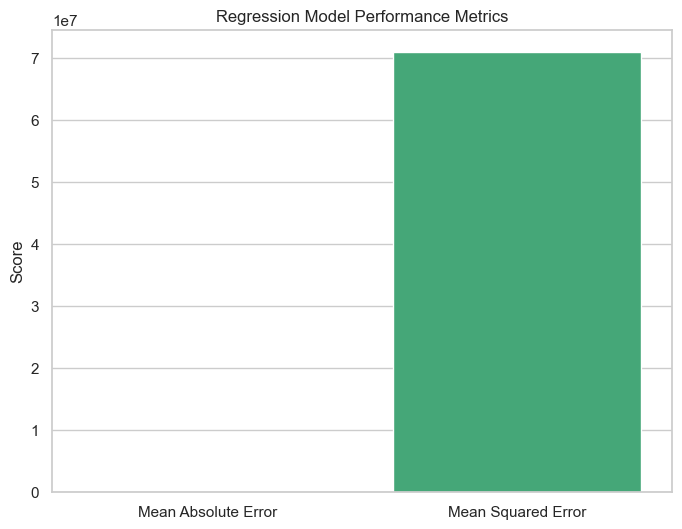

In [699]:
# Plot performance metrics
plt.figure(figsize=(8, 6))
metrics = {'Mean Absolute Error': mae_LR, 'Mean Squared Error': mse_LR}
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.ylabel('Score')
plt.title('Regression Model Performance Metrics')
plt.show()

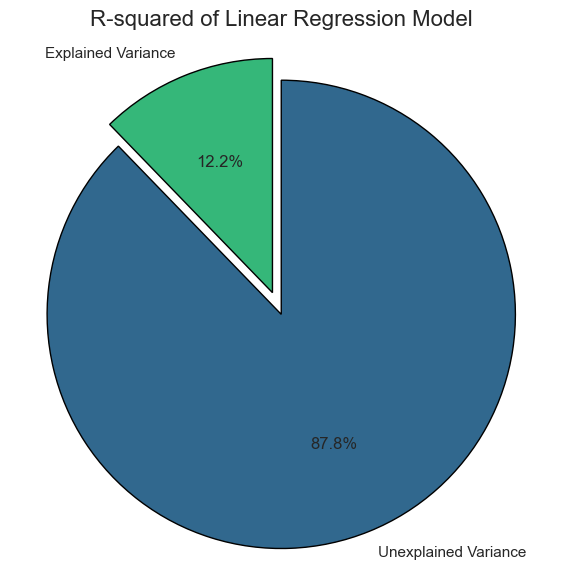

In [700]:
sns.set(style="whitegrid")
colors = sns.color_palette('viridis_r', 2)

plt.figure(figsize=(7, 7))
explode = (0.1, 0)  # Explode first slice

# Create the pie chart
plt.pie([r2_LR, 1 - r2_LR], labels=['Explained Variance', 'Unexplained Variance'], 
        autopct='%1.1f%%', startangle=90, explode=explode, 
        colors=colors, wedgeprops={'edgecolor': 'black'})

plt.title('R-squared of Linear Regression Model', fontsize=16)
plt.axis('equal')
plt.show()

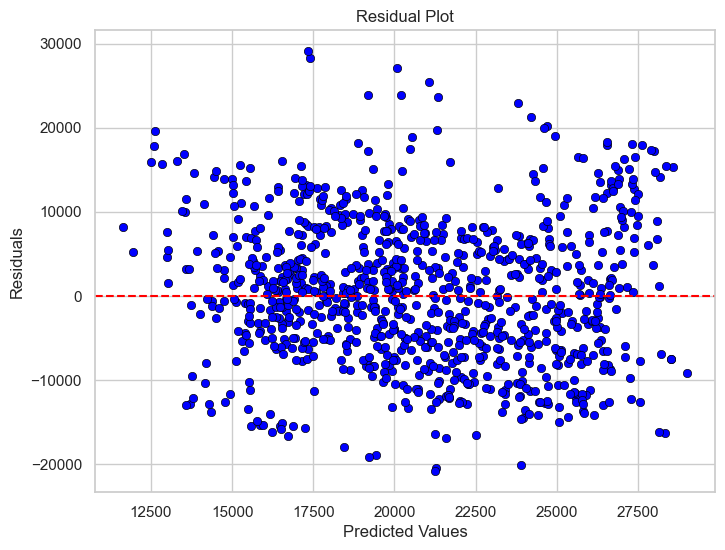

In [701]:
# Calculate residuals
residuals = y_test - y_pred_LR

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_LR, y=residuals, color='blue', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

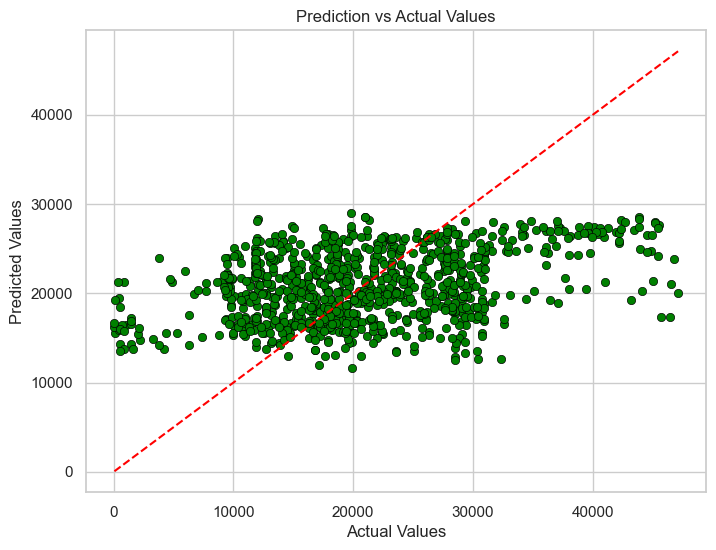

In [702]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_LR, color='green', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual Values')
plt.show()

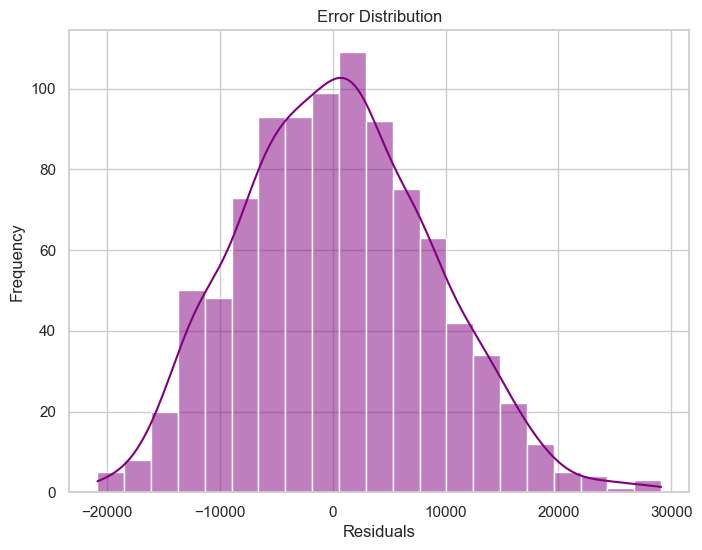

In [703]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.show()

## 02. Random Forest Regression

In [704]:
from sklearn.ensemble import RandomForestRegressor

In [705]:
# Creat a RandomForestRegression object
rf_model = RandomForestRegressor()


# Define hyperparameters for RandomForestRegressor
rf_params_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Perform GridSearch for RandomForestRegressor
rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_params_rf, cv=5, n_jobs=-1, verbose=2, scoring='r2')
rf_grid.fit(X_train_scaled, y_train)

# Best parameters for RandomForestRegressor
print(f"Best Parameters for RandomForest: {rf_grid.best_params_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters for RandomForest: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [706]:
y_pred_rf = rf_grid.predict(X_test_scaled)

# MSE and R2 calculating
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'MSE: {mse_rf}')
print(f'MAE: {mae_rf}')
print(f'R2: {r2_rf}')

MSE: 17623083.77691193
MAE: 2502.845522506834
R2: 0.7821535999931959


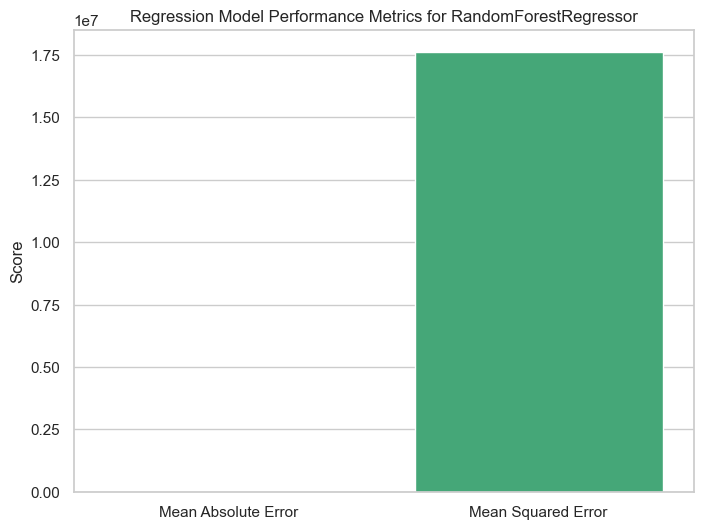

In [707]:
# Plot performance metrics
plt.figure(figsize=(8, 6))
metrics_rf = {'Mean Absolute Error': mae_rf, 'Mean Squared Error': mse_rf}
sns.barplot(x=list(metrics_rf.keys()), y=list(metrics_rf.values()), palette='viridis')
plt.ylabel('Score')
plt.title('Regression Model Performance Metrics for RandomForestRegressor')
plt.show()

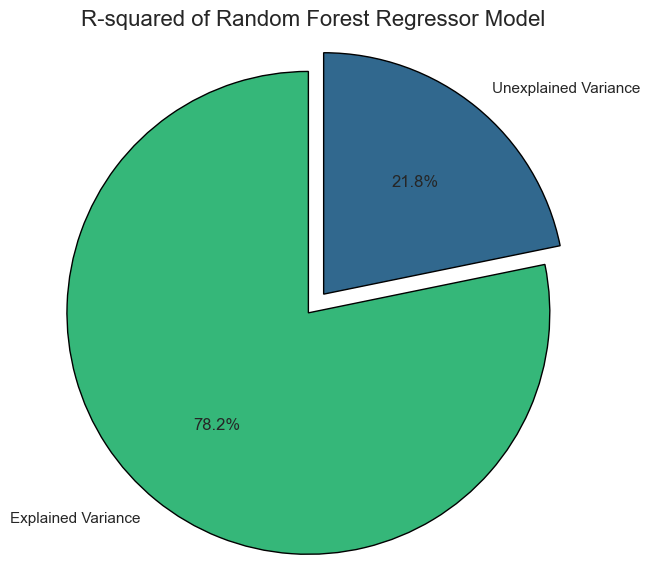

In [708]:
sns.set(style="whitegrid")
colors = sns.color_palette('viridis_r', 2)

plt.figure(figsize=(7, 7))
explode = (0.1, 0)  # Explode first slice

# Create the pie chart
plt.pie([r2_rf, 1 - r2_rf], labels=['Explained Variance', 'Unexplained Variance'], 
        autopct='%1.1f%%', startangle=90, explode=explode, 
        colors=colors, wedgeprops={'edgecolor': 'black'})

plt.title('R-squared of Random Forest Regressor Model', fontsize=16)
plt.axis('equal')
plt.show()

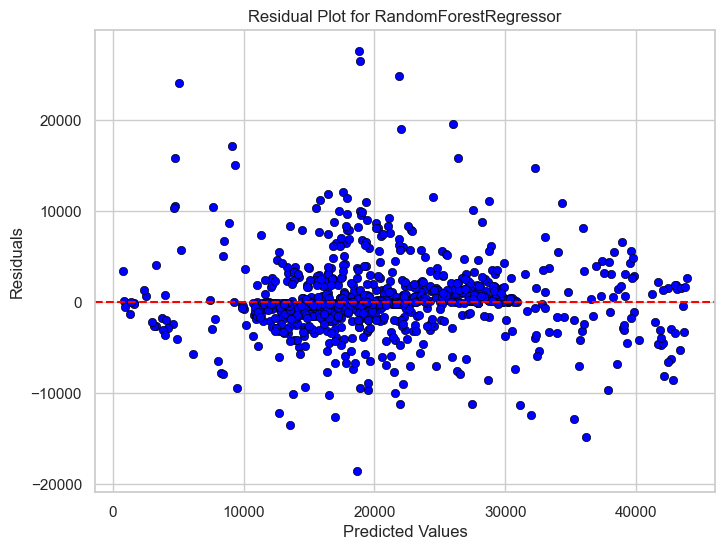

In [709]:
# Calculate residuals
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_rf, y=residuals_rf, color='blue', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for RandomForestRegressor')
plt.show()

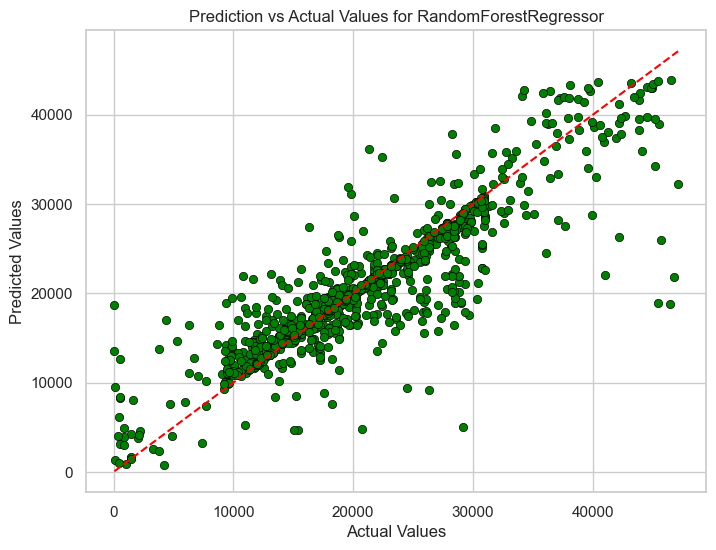

In [710]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='green', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual Values for RandomForestRegressor')
plt.show()

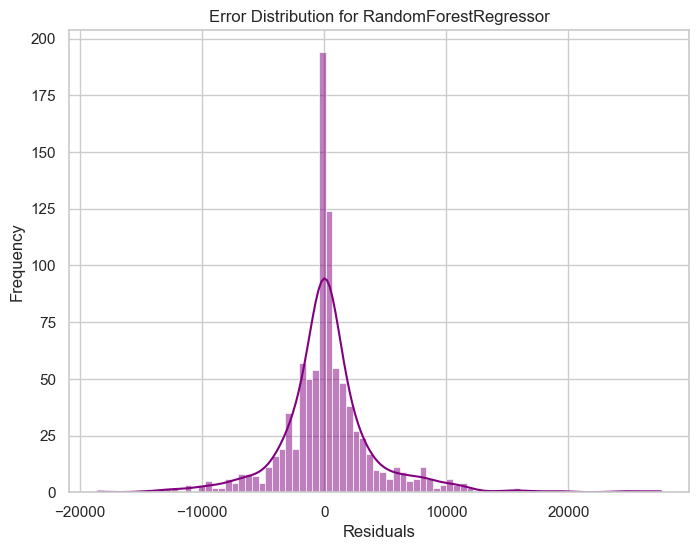

In [711]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals_rf, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Error Distribution for RandomForestRegressor')
plt.show()

## 03. SVR

In [712]:
from sklearn.svm import SVR

In [713]:
# Create a SVR object
svr_model = SVR()

# Define yperparameters for SVR
param_svr = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.2]
}

# Perform GridSearch for SVR
svr_grid = GridSearchCV(svr_model, param_svr, cv=5, scoring='r2', n_jobs=-1, verbose=2)
svr_grid.fit(X_train_scaled, y_train)

print(f"Best Parameters for SVR: {svr_grid.best_params_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters for SVR: {'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [714]:
y_pred_svr = svr_grid.predict(X_test_scaled)

# MSE and R2 calculating
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'MSE: {mse_svr}')
print(f'MAE: {mae_svr}')
print(f'R2: {r2_svr}')

MSE: 71681616.30457065
MAE: 6692.048809548981
R2: 0.1139131915676539


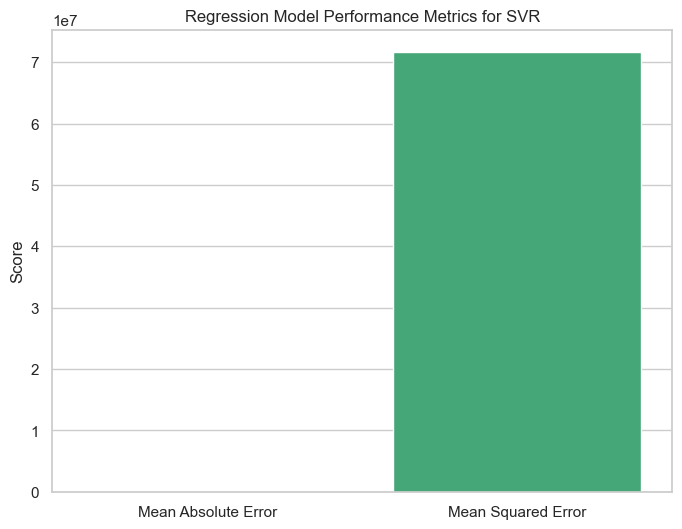

In [715]:
# Plot performance metrics
plt.figure(figsize=(8, 6))
metrics_svr = {'Mean Absolute Error': mae_svr, 'Mean Squared Error': mse_svr}
sns.barplot(x=list(metrics_svr.keys()), y=list(metrics_svr.values()), palette='viridis')
plt.ylabel('Score')
plt.title('Regression Model Performance Metrics for SVR')
plt.show()

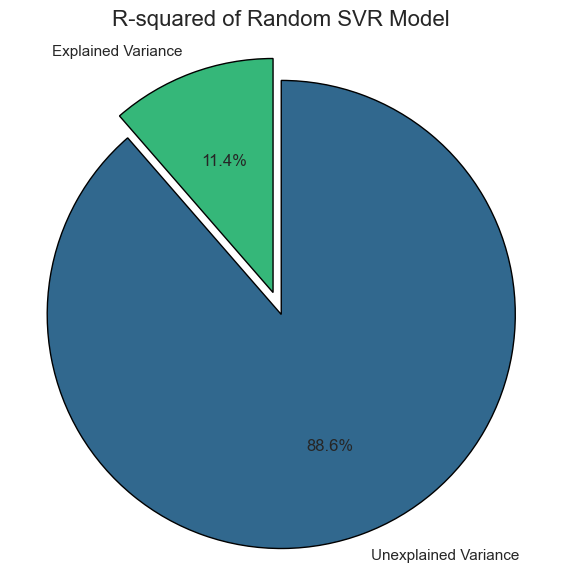

In [716]:
sns.set(style="whitegrid")
colors = sns.color_palette('viridis_r', 2)

plt.figure(figsize=(7, 7))
explode = (0.1, 0)  # Explode first slice

# Create the pie chart
plt.pie([r2_svr, 1 - r2_svr], labels=['Explained Variance', 'Unexplained Variance'], 
        autopct='%1.1f%%', startangle=90, explode=explode, 
        colors=colors, wedgeprops={'edgecolor': 'black'})

plt.title('R-squared of Random SVR Model', fontsize=16)
plt.axis('equal')
plt.show()

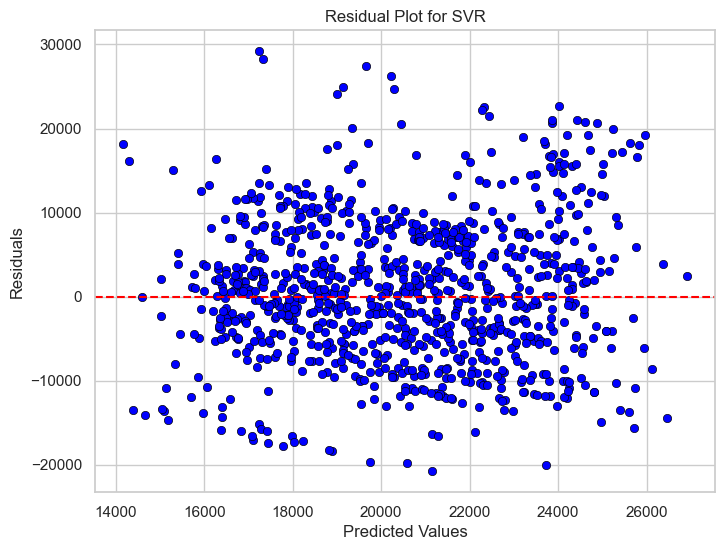

In [717]:
# Calculate residuals
residuals_svr = y_test - y_pred_svr

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_svr, y=residuals_svr, color='blue', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for SVR')
plt.show()

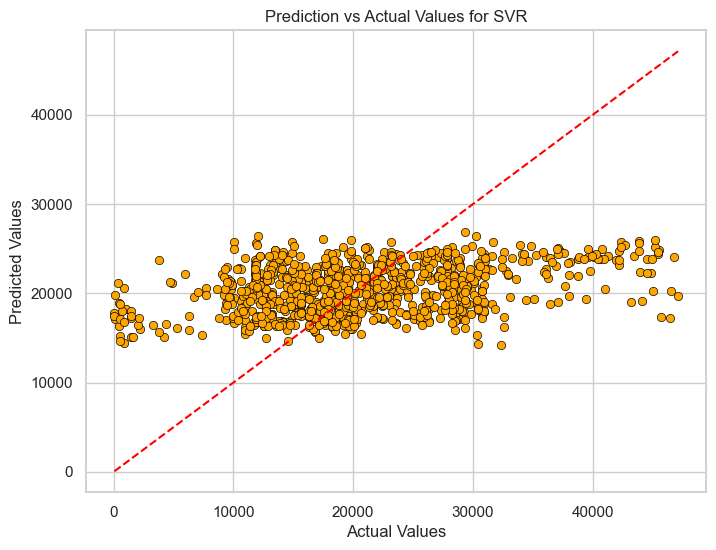

In [718]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_svr, color='orange', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual Values for SVR')
plt.show()

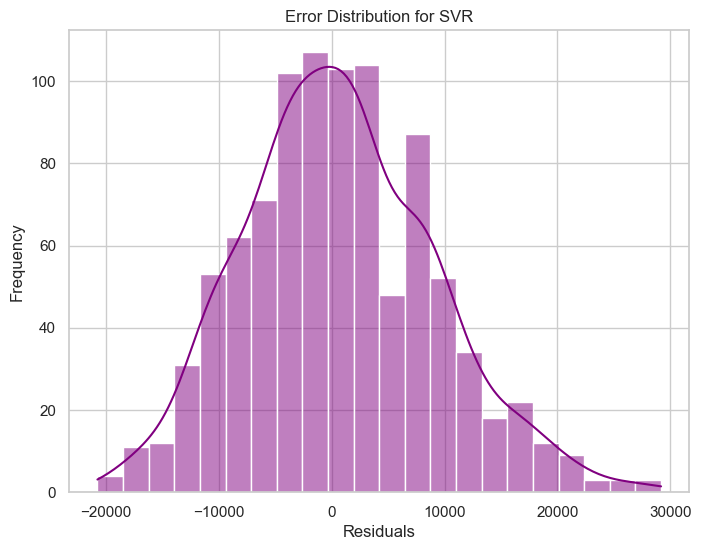

In [719]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals_svr, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Error Distribution for SVR')
plt.show()

## 04. Gradient boosting

In [720]:
from sklearn.ensemble import GradientBoostingRegressor

In [721]:
# Create a GradientBoostingRegressor object
gb_model = GradientBoostingRegressor()

# Define hyperparameters for GradientBoostingRegressor
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Perform GridSearch for GradientBoostingRegressor
gb_grid = GridSearchCV(gb_model, gb_params, cv=5, scoring='r2', n_jobs=-1, verbose=2)
gb_grid.fit(X_train_scaled, y_train)

# Best parameters for GradientBoostingRegressor
print(f"Best GradientBoosting Parameters: {gb_grid.best_params_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best GradientBoosting Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [722]:
y_pred_gb = gb_grid.best_estimator_.predict(X_test_scaled)

# MSE and R2 calculating
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'MSE: {mse_gb}')
print(f'MAE: {mae_gb}')
print(f'R2: {r2_gb}')

MSE: 16769158.595461676
MAE: 2669.3863527794797
R2: 0.7927093307046282


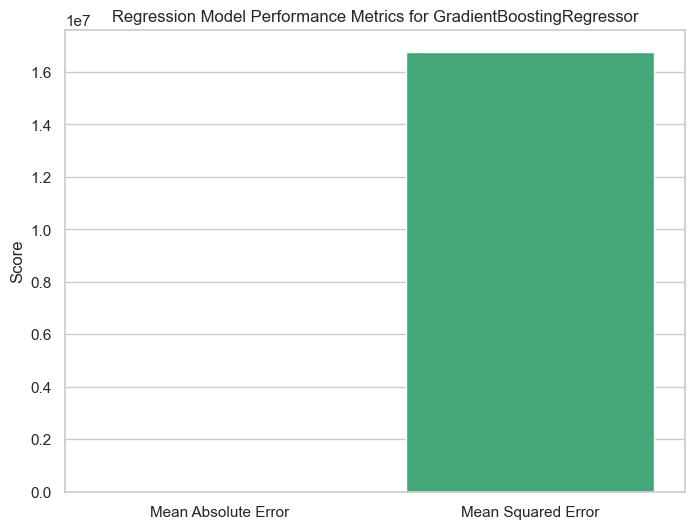

In [723]:
# Plot performance metrics
plt.figure(figsize=(8, 6))
metrics_gb = {'Mean Absolute Error': mae_gb, 'Mean Squared Error': mse_gb}
sns.barplot(x=list(metrics_gb.keys()), y=list(metrics_gb.values()), palette='viridis')
plt.ylabel('Score')
plt.title('Regression Model Performance Metrics for GradientBoostingRegressor')
plt.show()

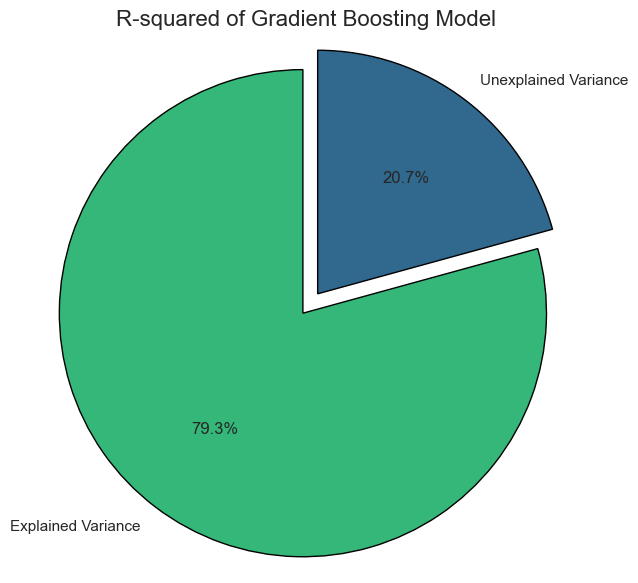

In [724]:
sns.set(style="whitegrid")
colors = sns.color_palette('viridis_r', 2)

plt.figure(figsize=(7, 7))
explode = (0.1, 0)  # Explode first slice

# Create the pie chart
plt.pie([r2_gb, 1 - r2_gb], labels=['Explained Variance', 'Unexplained Variance'], 
        autopct='%1.1f%%', startangle=90, explode=explode, 
        colors=colors, wedgeprops={'edgecolor': 'black'})

plt.title('R-squared of Gradient Boosting Model', fontsize=16)
plt.axis('equal')
plt.show()

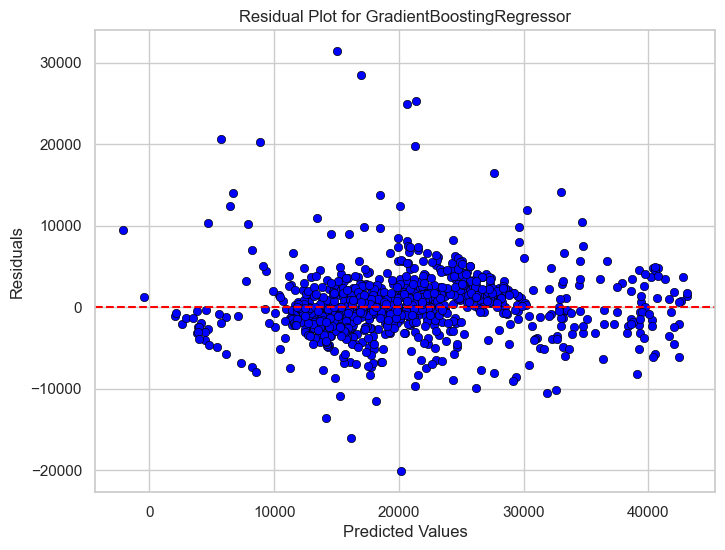

In [725]:
# Calculate residuals
residuals_gb = y_test - y_pred_gb

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_gb, y=residuals_gb, color='blue', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for GradientBoostingRegressor')
plt.show()

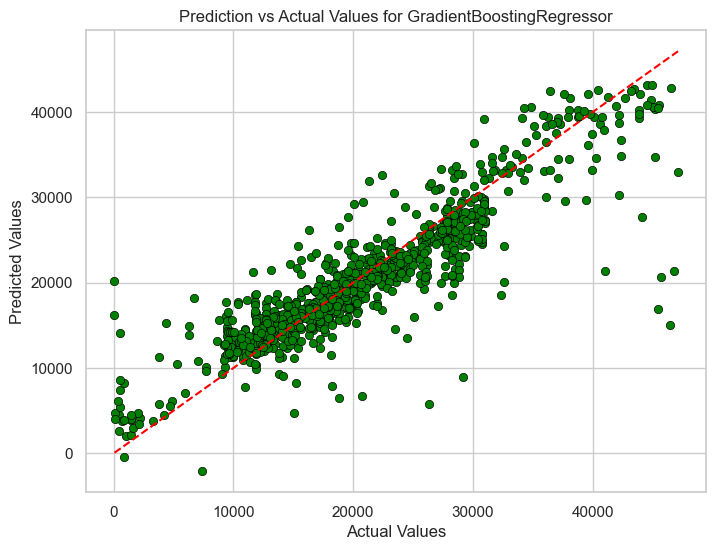

In [726]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_gb, color='green', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual Values for GradientBoostingRegressor')
plt.show()

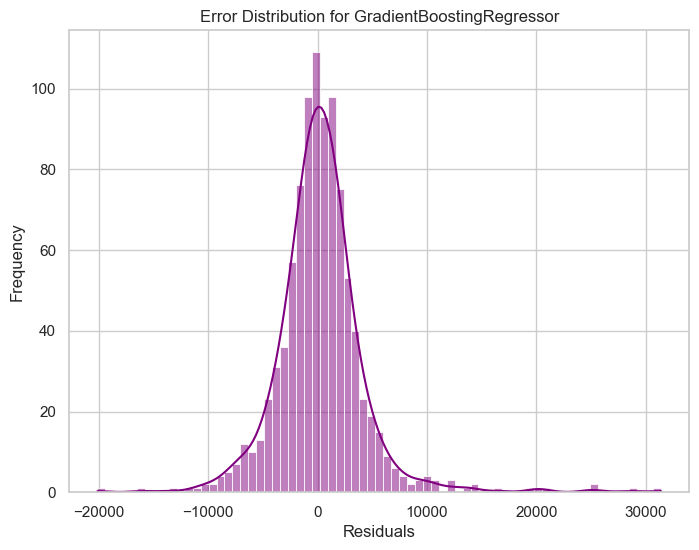

In [727]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals_gb, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Error Distribution for GradientBoostingRegressor')
plt.show()

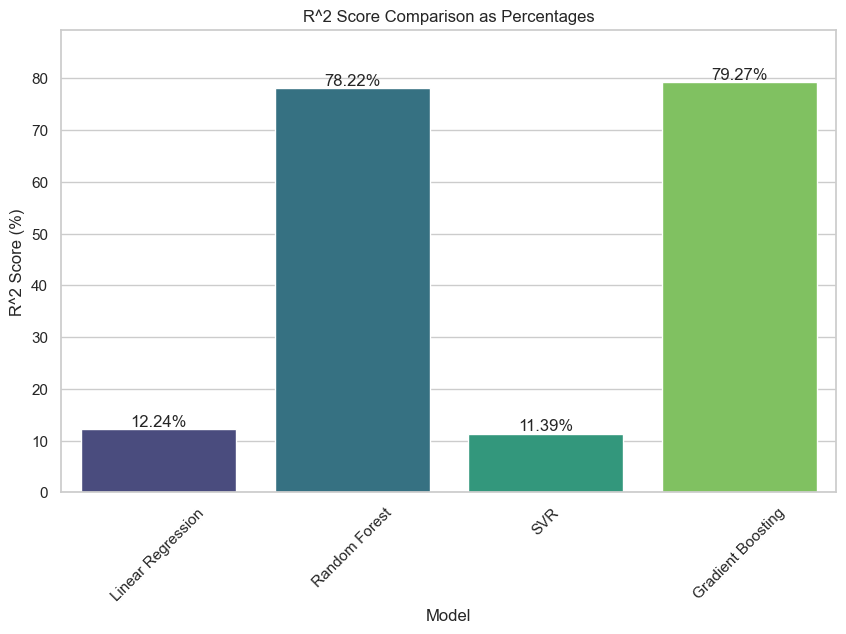

In [728]:
# Define models and their names
models = ['Linear Regression', 'Random Forest', 'SVR', 'Gradient Boosting']
y_preds = [y_pred_LR, y_pred_rf, y_pred_svr, y_pred_gb]

# Calculate R² values and convert to percentages
r2_values = [r2_score(y_test, y_pred) * 100 for y_pred in y_preds]

# Create a DataFrame for easy plotting
metrics_df = pd.DataFrame({
    'Model': models,
    'R^2 Score (%)': r2_values
})

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='R^2 Score (%)', data=metrics_df, palette='viridis')

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set y-axis limits to focus on the range of interest
plt.ylim(0, max(r2_values) + 10)  # Expand y-axis slightly above the maximum value

plt.title('R^2 Score Comparison as Percentages')
plt.ylabel('R^2 Score (%)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

Performance of Random Forest is the best model among the other models

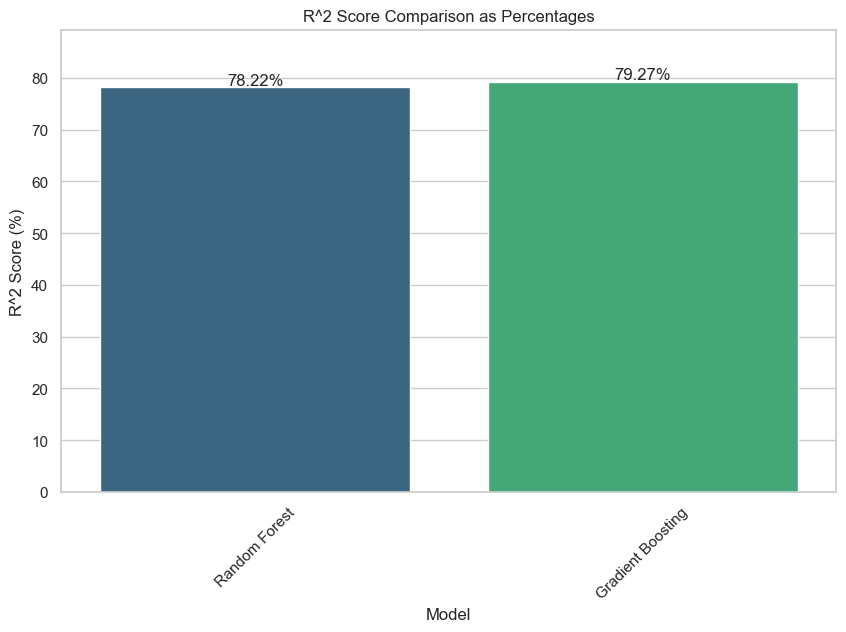

In [729]:
# Define models and their names
models = ['Random Forest', 'Gradient Boosting']
y_preds = [y_pred_rf, y_pred_gb]

# Calculate R² values and convert to percentages
r2_values = [r2_score(y_test, y_pred) * 100 for y_pred in y_preds]

# Create a DataFrame for easy plotting
metrics_df = pd.DataFrame({
    'Model': models,
    'R^2 Score (%)': r2_values
})

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='R^2 Score (%)', data=metrics_df, palette='viridis')

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set y-axis limits to focus on the range of interest
plt.ylim(0, max(r2_values) + 10)  # Expand y-axis slightly above the maximum value

plt.title('R^2 Score Comparison as Percentages')
plt.ylabel('R^2 Score (%)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

## Summary of odel Performance for Hyundai Car Price Prediction

By comparing the performance of the prediction Random Forest and Gradient Boosting are having the highest accuracies while SVR(Support Vector Regressor) and Linear Regression is not.

So, according to the performance we are using  Random Forest model which is having the highest accuracy over Gradient Boosting model.

## Save the Random Forest Model

In [730]:
# Save the rf_grid model to a file using pickle
model_filename = "model.pkl"
with open(model_filename, 'wb') as model_filename:
    pickle.dump(rf_grid, model_filename)

## Load the saved model

In [731]:
# Load the model from the file
model_filename = "model.pkl"
with open(model_filename, 'rb') as model_filename:
    loaded_model = pickle.load(model_filename)

In [732]:
# Load the saved model from the GB_model_file
loaded_model = pickle.load(open('model.pkl', 'rb'))
loaded_model

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 150, 200]},
             scoring='r2', verbose=2)

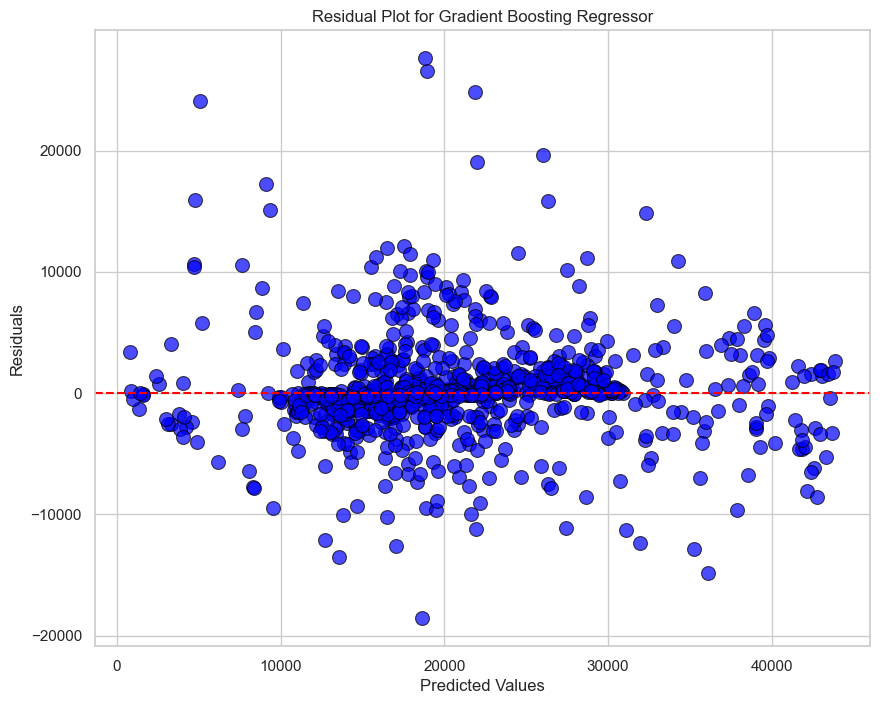

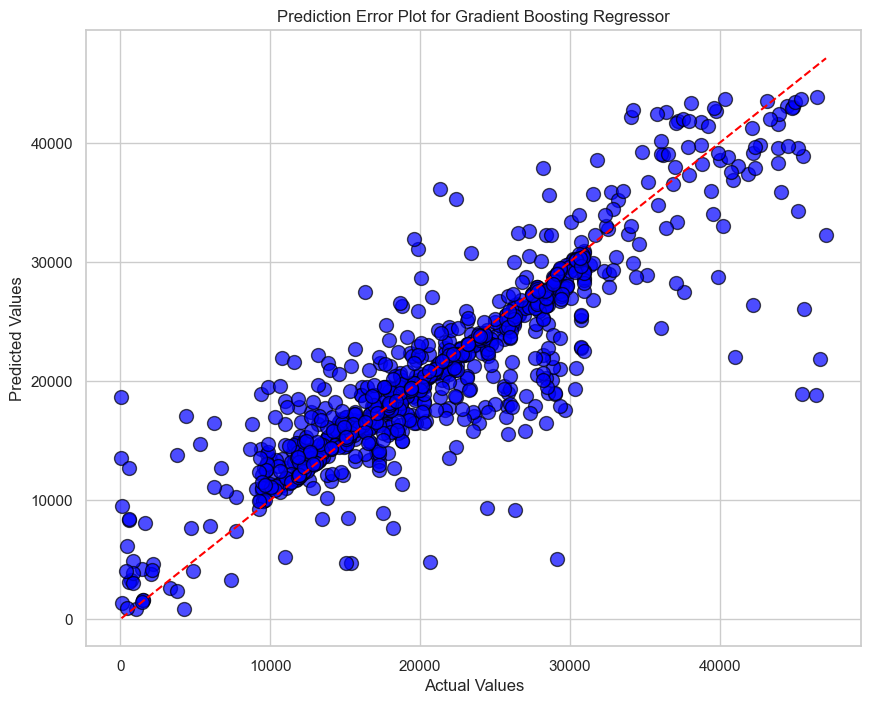

In [733]:
# Predict values
y_pred = loaded_model.predict(X_test_scaled)

# Calculate residuals
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_pred, y=residuals, color='blue', edgecolor='black', s=100, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Gradient Boosting Regressor')
plt.grid(True)
plt.show()

# Prediction Error Plot
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black', s=100, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Error Plot for Gradient Boosting Regressor')
plt.grid(True)
plt.show()

In [734]:
# Reverse mappings for decoding
reverse_mappings = {
    'Manufacturer': {0: 'HYUNDAI'},
    'Category': {0: 'Jeep', 1: 'Sedan', 2: 'Universal', 3: 'Minivan', 4: 'Coupe', 5: 'Hatchback', 6: 'Microbus', 7: 'Goods wagon', 8: 'Pickup'},
    'Leather interior': {0: 'No', 1: 'Yes'},
    'Fuel type': {0: 'CNG', 1: 'Diesel', 2: 'Hybrid', 3: 'Hydrogen', 4: 'LPG', 5: 'Petrol', 6: 'Plug-in-Hybrid'},
    'Gear box type': {0: 'Manual', 1: 'Automatic'},
    'Drive wheels': {0: 'Front', 1: 'Rear', 2: '4*4'},
    'Wheel': {0: 'Left Wheel', 1: 'Right Wheel'},
    'Color': {0: 'Beige', 1: 'Black', 2: 'Blue', 3: 'Brown', 4: 'Carnelian Red', 5: 'Golden', 6: 'Green', 7: 'Grey', 8: 'Orange', 9: 'Purple', 10: 'Red', 11: 'Silver', 12: 'Sky Blue', 13: 'White', 14: 'Yellow'}
}

# Function to decode the encoded data
def decode_data(encoded_df, reverse_mappings):
    decoded_df = encoded_df.copy()
    for column, mapping in reverse_mappings.items():
        decoded_df[column] = encoded_df[column].map(mapping)
    return decoded_df

# Decode the DataFrame
decoded_df = decode_data(df, reverse_mappings)

# Display the original and decoded DataFrames
print("Original Encoded DataFrame:")
print(df)
print("\nDecoded DataFrame:")
print(decoded_df)

Original Encoded DataFrame:
             Price  Manufacturer  Model  Prod. year  Category  \
1065   21326.00000             0      0        2016         7   
1066    9408.00000             0      0        2012         2   
1068   13877.00000             0      0        2012         7   
1069   14113.00000             0      0        2013         2   
1070   16289.00000             0      0        2015         7   
...            ...           ...    ...         ...       ...   
26917  23172.10322             0     23        2010         6   
26921  26281.90363             0     14        2013         6   
26924  15199.15257             0     21        2007         6   
26925  26261.49922             0     20        2007         6   
26926  27864.78840             0     26        2015         6   

       Leather interior  Fuel type  Engine volume       Mileage  Cylinders  \
1065                  0          5            1.6   80000.00000          4   
1066                  1          1 

In [735]:
# Test  thhe Random forest model with a sample data
sample_data = X_test_scaled[0].reshape(1, -1)
sample_data

array([[ 0.        , -0.9122986 ,  1.07635509, -0.16173508, -1.55081202,
        -0.42228019,  2.10393328,  0.73828789, -1.44031657,  0.10355092,
         1.66844938,  0.01881491, -0.63012604, -1.0747501 ,  1.6420805 ]])